# CDC Diabetes Health Indicators

## Problem Statement
Diabetes is a growing health concern worldwide, with significant implications for public health systems. In Kenya, the prevalence of diabetes is increasing, particularly in urban areas. There is a need to understand the relationship between lifestyle factors and diabetes to develop effective interventions. This project aims to analyze the CDC Diabetes Health Indicators Dataset to identify key risk factors for diabetes and provide actionable insights to improve diabetes care and prevention in Kenya.

## Business Understanding
The primary objective of this project is to better understand the relationship between lifestyle and diabetes in the US using the CDC Diabetes Health Indicators Dataset. This topic is of particular interest due to the rising prevalence of diabetes in Kenya, especially in urban areas. By studying this data, we aim to create awareness about diabetes and develop interventions to reduce the prevalence of risk factors for kidney failure and improve diabetes care in Kenya. This project applies to the Health and Medicine domain and targets the Ministry of Health, teaching institutions, Non-Governmental Organizations, the private sector, and teaching hospitals in Kenya. If successful, this analysis could significantly impact by raising awareness and guiding interventions to improve diabetes care and reduce related health risks.

## Data Understanding
We will collect data on diabetes diagnosis, demographics (race, sex), personal information (income, education), and health history (drinking, smoking, mental health, physical health). The raw data is sourced from [Kaggle's Diabetes Health Indicators Dataset](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset) and is available for download and public use. The features include integer and binary variables, and the dataset does not contain missing values. We will handle data preprocessing tasks such as encoding categorical variables and scaling numerical features while addressing data privacy and managing any inconsistent data.


In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import os
print(os.getcwd())

/content


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# Load the dataset
data =pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")

# Display the first few rows and summary of the dataset
data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

(   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
 0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
 1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
 2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
 3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
 4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   
 
    HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
 0                   0.0           0.0     0.0  ...            1.0   
 1                   0.0           1.0     0.0  ...            0.0   
 2                   0.0           0.0     1.0  ...            1.0   
 3                   0.0           1.0     1.0  ...            1.0   
 4                   0.0           1.0     1.0  ...            1.0   
 
    NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
 0          0.0      5.0      18.0      15.0       1.0  0.0   9.0     

### Variables Table

This dataset is from the UCI Machine Learning Repository and contains health indicators related to diabetes, collected through a questionnaire given to participants. Below is a detailed description of the data:

| Variable Name          | Role    | Type     | Description                                                                                                             | Units      | Missing Values |
|------------------------|---------|----------|------------------------------------------------------------------------------------------------------------------------|------------|----------------|
| **ID**                 | ID      | Integer  | Patient ID                                                                                                             | -          | no             |
| **Diabetes_binary**    | Target  | Binary   | 0 = no diabetes, 1 = prediabetes or diabetes                                                                           | -          | no             |
| **HighBP**             | Feature | Binary   | 0 = no high BP, 1 = high BP                                                                                            | -          | no             |
| **HighChol**           | Feature | Binary   | 0 = no high cholesterol, 1 = high cholesterol                                                                          | -          | no             |
| **CholCheck**          | Feature | Binary   | 0 = no cholesterol check in 5 years, 1 = yes cholesterol check in 5 years                                              | -          | no             |
| **BMI**                | Feature | Integer  | Body Mass Index                                                                                                        | -          | no             |
| **Smoker**             | Feature | Binary   | Have you smoked at least 100 cigarettes in your entire life? (5 packs = 100 cigarettes) 0 = no, 1 = yes                | -          | no             |
| **Stroke**             | Feature | Binary   | (Ever told) you had a stroke. 0 = no, 1 = yes                                                                          | -          | no             |
| **HeartDiseaseorAttack** | Feature | Binary | Coronary heart disease (CHD) or myocardial infarction (MI). 0 = no, 1 = yes                                            | -          | no             |
| **PhysActivity**       | Feature | Binary   | Physical activity in past 30 days - not including job. 0 = no, 1 = yes                                                 | -          | no             |
| **Fruits**             | Feature | Binary   | Consume fruit 1 or more times per day. 0 = no, 1 = yes                                                                 | -          | no             |
| **Veggies**            | Feature | Binary   | Consume vegetables 1 or more times per day. 0 = no, 1 = yes                                                            | -          | no             |
| **HvyAlcoholConsump**  | Feature | Binary   | Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week). 0 = no, 1 = yes | -    | no             |
| **AnyHealthcare**      | Feature | Binary   | Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no, 1 = yes     | -          | no             |
| **NoDocbcCost**        | Feature | Binary   | Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no, 1 = yes  | -          | no             |
| **GenHlth**            | Feature | Integer  | Would you say that in general your health is: scale 1-5 (1 = excellent, 2 = very good, 3 = good, 4 = fair, 5 = poor)   | -          | no             |
| **MentHlth**           | Feature | Integer  | Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? scale 1-30 days | -          | no             |
| **PhysHlth**           | Feature | Integer  | Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? scale 1-30 days | -          | no             |
| **DiffWalk**           | Feature | Binary   | Do you have serious difficulty walking or climbing stairs? 0 = no, 1 = yes                                             | -          | no             |
| **Sex**                | Feature | Binary   | Sex. 0 = female, 1 = male                                                                                              | -          | no             |
| **Age**                | Feature | Integer  | Age (13-level age category, see codebook). 1 = 18-24, 9 = 60-64, 13 = 80 or older                                      | -          | no             |
| **Education**          | Feature | Integer  | Education level (EDUCA, see codebook). Scale 1-6 (1 = Never attended school or only kindergarten, 2 = Grades 1 through 8, 3 = Grades 9 through 11, 4 = Grade 12 or GED, 5 = College 1-3 years, 6 = College 4+ years) | -          | no             |
| **Income**             | Feature | Integer  | Income scale (INCOME2, see codebook). Scale 1-8 (1 = less than $10,000, 5 = less than $35,000, 8 = $75,000 or more)    | -          | no             |

---

### Key Variables
1. **BMI (Body Mass Index)**:
   - **Importance**: A well-known risk factor for diabetes, higher BMI indicates overweight or obesity, which is strongly associated with diabetes.

2. **HighBP (High Blood Pressure)**:
   - **Importance**: High blood pressure is often found in individuals with diabetes and can be a significant predictor.

3. **HighChol (High Cholesterol)**:
   - **Importance**: High cholesterol levels are another risk factor for diabetes and related cardiovascular diseases.

4. **PhysActivity (Physical Activity)**:
   - **Importance**: Regular physical activity is known to reduce the risk of diabetes. Lack of physical activity can be a significant risk factor.

5. **Smoker**:
   - **Importance**: Smoking is associated with various health issues, including increased risk of diabetes.

6. **GenHlth (General Health)**:
   - **Importance**: General health status can provide insights into overall health and well-being, which can be correlated with diabetes risk.

7. **MentHlth (Mental Health)**:
   - **Importance**: Mental health issues can indirectly affect diabetes risk through lifestyle choices and stress-related factors.

8. **PhysHlth (Physical Health)**:
   - **Importance**: Similar to general health, physical health status can indicate the presence of other conditions that may influence diabetes risk.

9. **Age**:
   - **Importance**: Age is a non-modifiable risk factor for diabetes, with prevalence increasing with age.

10. **Sex**:
    - **Importance**: Understanding differences in diabetes prevalence and risk between males and females can be crucial for targeted interventions.

11. **Education**:
    - **Importance**: Education level can influence health literacy and lifestyle choices, impacting diabetes risk.

12. **Income**:
    - **Importance**: Income level can affect access to healthcare, healthy food options, and overall lifestyle, impacting diabetes risk.


## Data Cleaning

In [ ]:
# Check for duplicate rows
duplicate_rows = data.duplicated().sum()
duplicate_rows

23899

The data contains duplicate entries which, we have chosen not to remove since doing so could skew the dataset's distribution or fail to account for variations that are necessary for model robustness.

In [ ]:
pd.set_option('display.max_columns', None)
data

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [ ]:
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


The dataset now has 229,781 rows and 22 columns after removing duplicates. All columns are of type float64, which is appropriate for the numerical variables in this dataset.

In [ ]:
#Change the name of 'diabetes_012' column to "Diabetes_binary" since it indicates whether a person has diabetes (1) or not (0).
data = data.rename(columns={'Diabetes_012': 'Diabetes_binary'})
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


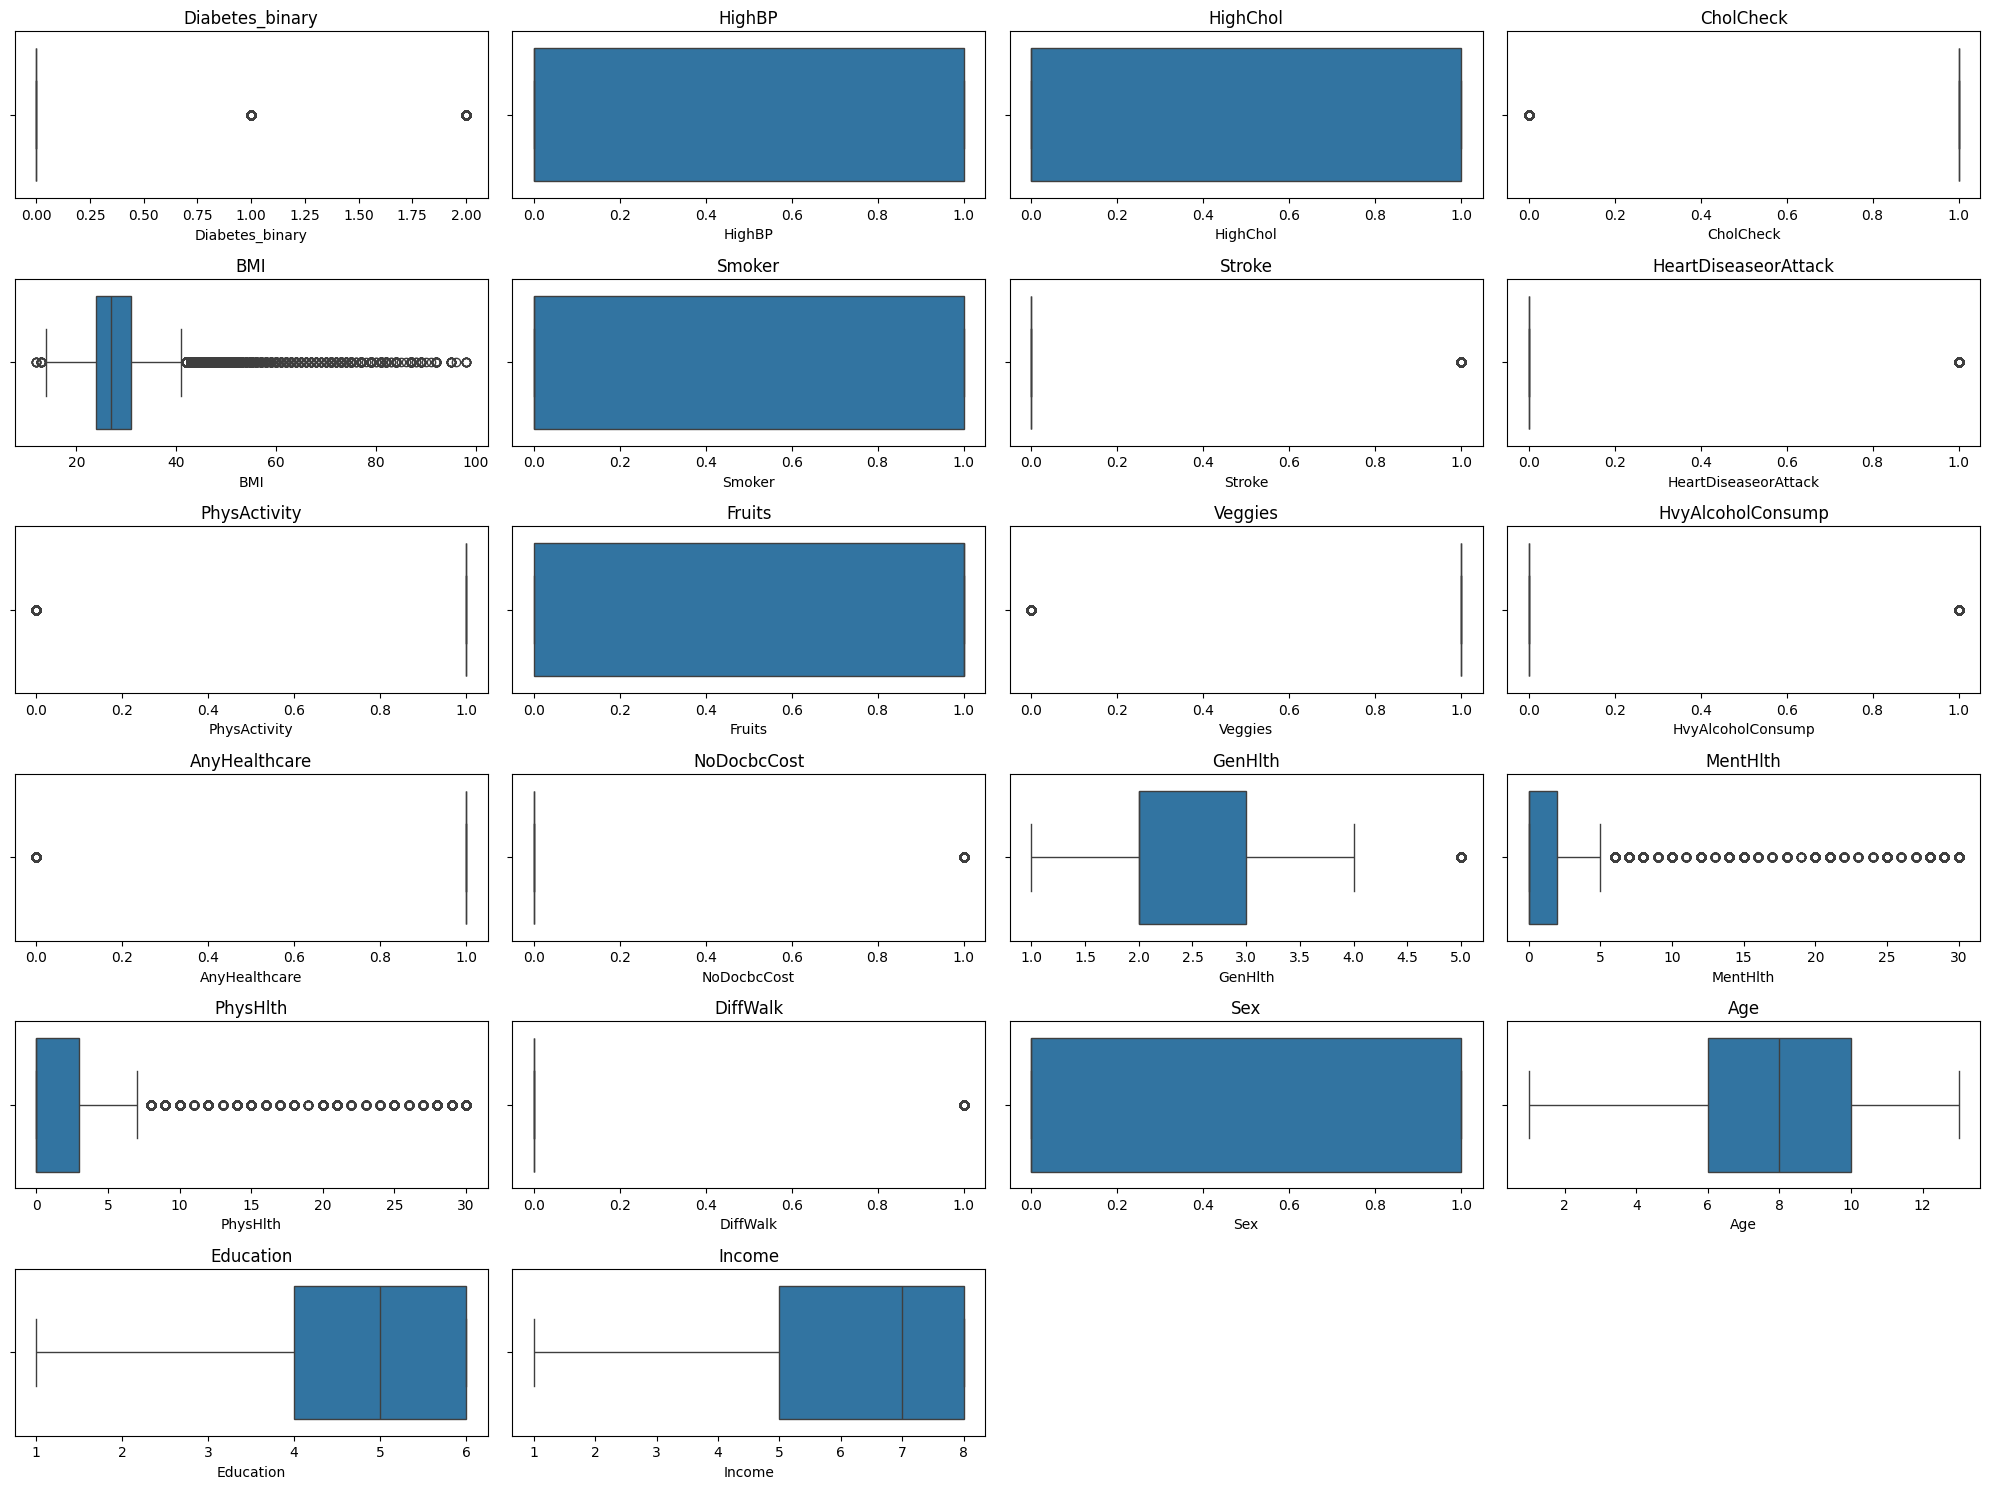

In [ ]:
#Identifying Outliers
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 15))
for i, column in enumerate(data.columns):
    plt.subplot(6, 4, i+1)
    sns.boxplot(x=data[column])
    plt.title(column)

plt.tight_layout()
plt.show()


In [ ]:
## HANDLING OUTLIERS

# Function to handle outliers using IQR method
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Handle outliers for the identified variables
outlier_columns = ['GenHlth','Age','BMI']
for col in outlier_columns:
    data = handle_outliers(data, col)

data.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,232960.000000,232960.000000,232960.000000,232960.000000,232960.000000,232960.000000,232960.000000,232960.000000,232960.000000,232960.000000,232960.000000,232960.000000,232960.000000,232960.000000,232960.000000,232960.00000,232960.000000,232960.000000,232960.000000,232960.000000,232960.000000,232960.000000
mean,0.258620,0.407976,0.412753,0.961380,27.524150,0.433383,0.033997,0.081370,0.779056,0.641775,0.818548,0.058237,0.952644,0.075017,2.363393,2.66787,3.158873,0.129932,0.445561,8.013925,5.090715,6.186199
std,0.658091,0.491460,0.492330,0.192689,4.920763,0.495543,0.181222,0.273403,0.414883,0.479480,0.385393,0.234192,0.212399,0.263420,0.929719,6.65203,7.299373,0.336230,0.497029,3.077827,0.966291,1.996606
min,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.00000,2.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,41.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,30.00000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


We noted outliers in the following columns; GenHlth, BMI, PhysHlth and MentHlth. We will asess how these outliers impact your predictive model. We will run your models with and without the outliers to see if there is a significant difference in performance

In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,232960.0,0.258620,0.658091,0.0,0.0,0.0,0.0,2.0
HighBP,232960.0,0.407976,0.491460,0.0,0.0,0.0,1.0,1.0
HighChol,232960.0,0.412753,0.492330,0.0,0.0,0.0,1.0,1.0
CholCheck,232960.0,0.961380,0.192689,0.0,1.0,1.0,1.0,1.0
BMI,232960.0,27.524150,4.920763,14.0,24.0,27.0,31.0,41.0
Smoker,232960.0,0.433383,0.495543,0.0,0.0,0.0,1.0,1.0
Stroke,232960.0,0.033997,0.181222,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,232960.0,0.081370,0.273403,0.0,0.0,0.0,0.0,1.0
PhysActivity,232960.0,0.779056,0.414883,0.0,1.0,1.0,1.0,1.0
Fruits,232960.0,0.641775,0.479480,0.0,0.0,1.0,1.0,1.0


In [ ]:
# Chacking if the target is imbalanced
diabetes_distribution = data['Diabetes_binary'].value_counts()

diabetes_distribution

Diabetes_binary
0.0    200824
2.0     28112
1.0      4024
Name: count, dtype: int64

This distribution indicates that the dataset is imbalanced, with a significantly larger proportion of non-diabetic individuals compared to prediabetic and diabetic ones.

No Diabetes (0): 146,456 occurrences (85.11%)

Pre-diabetic (1) and Diabetic (2): 19,463 occurrences (14.89%)

The categories Pre-diabetic (1) and Diabetic (2) together make up a smaller portion of the dataset compared to those with no diabetes. This imbalance needs to be taken into consideration when developing predictive models, as it can affect model performance.

## Exploratory Data Analysis

### Univariate Analysis

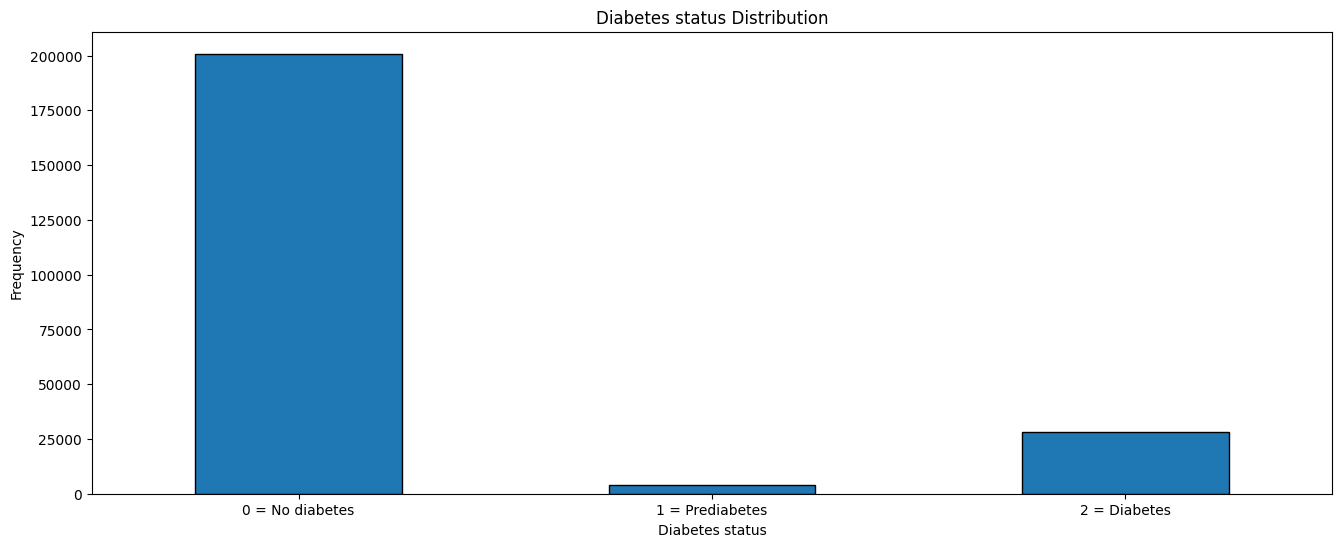

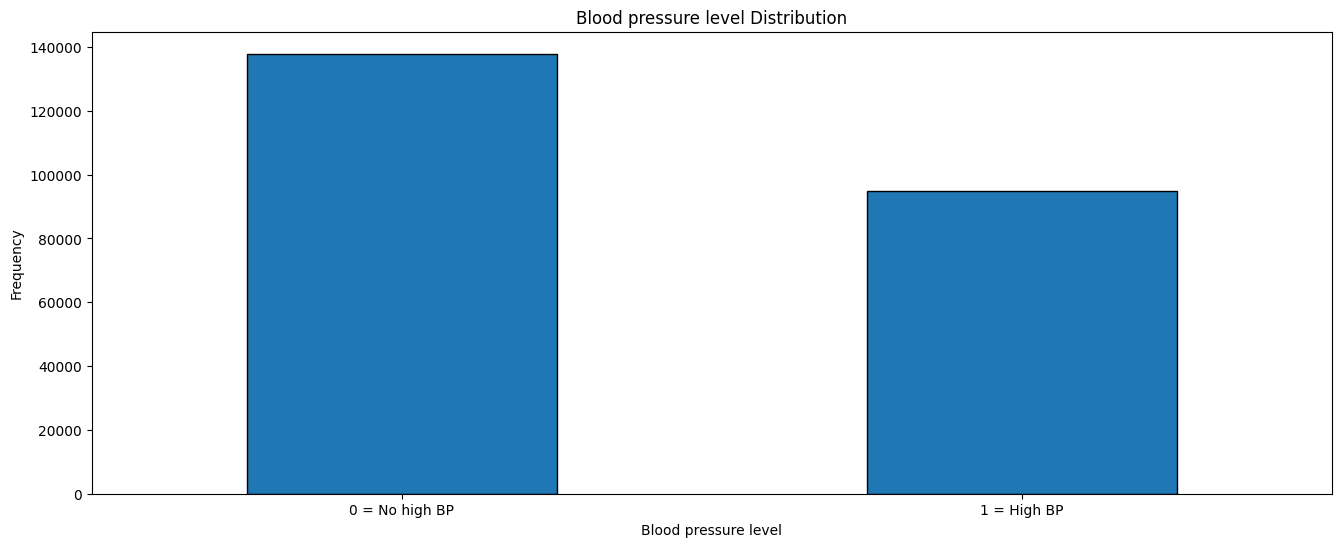

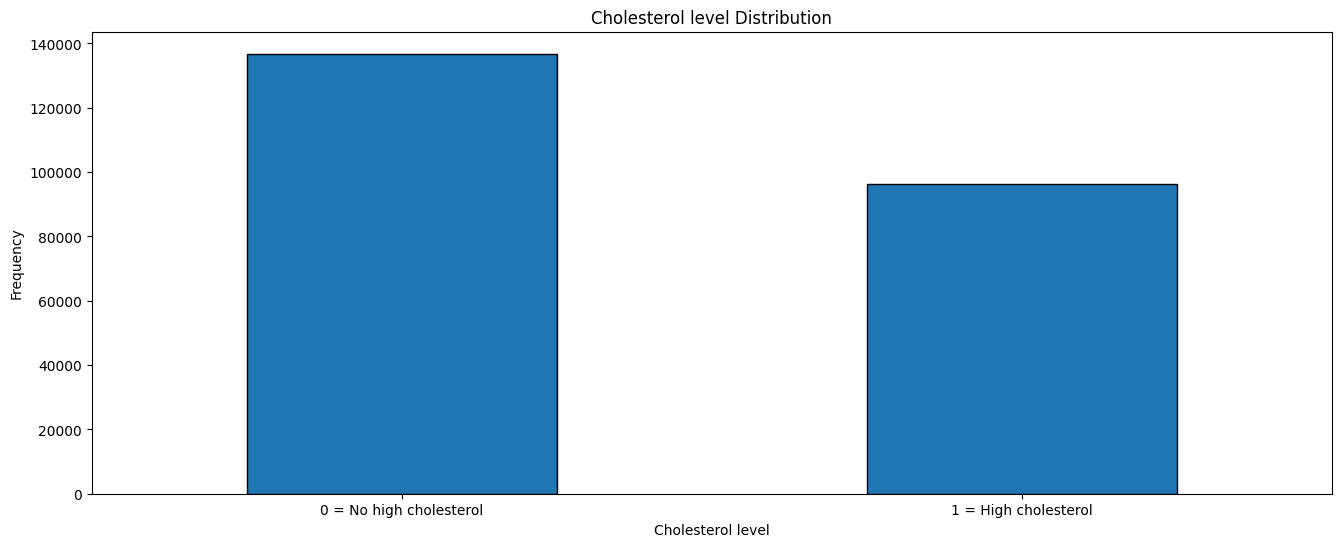

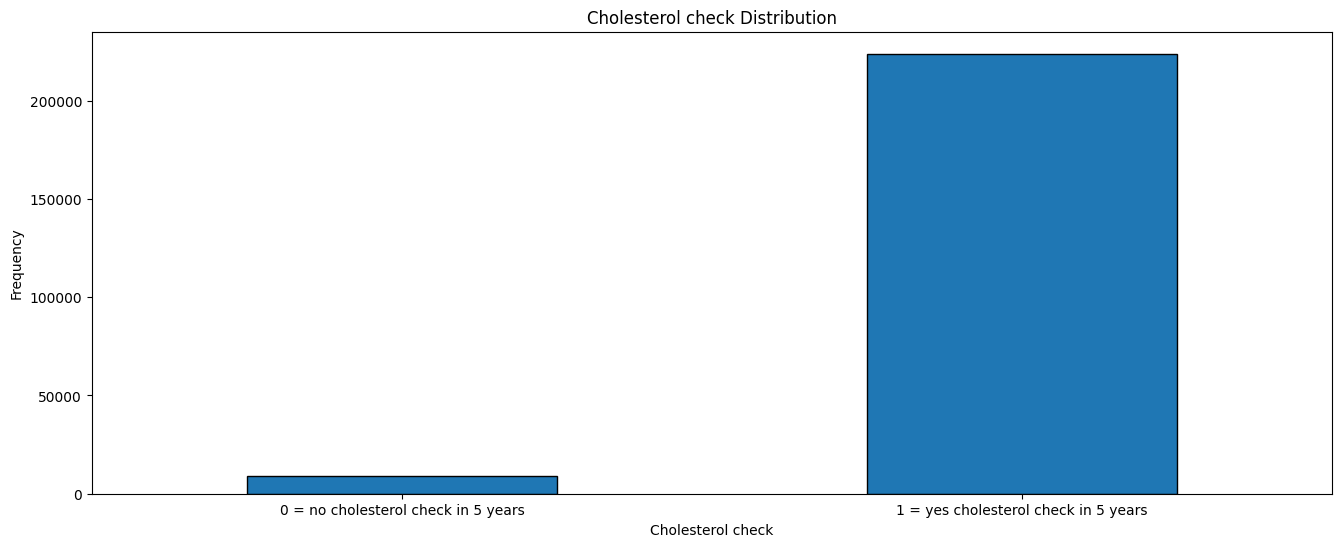

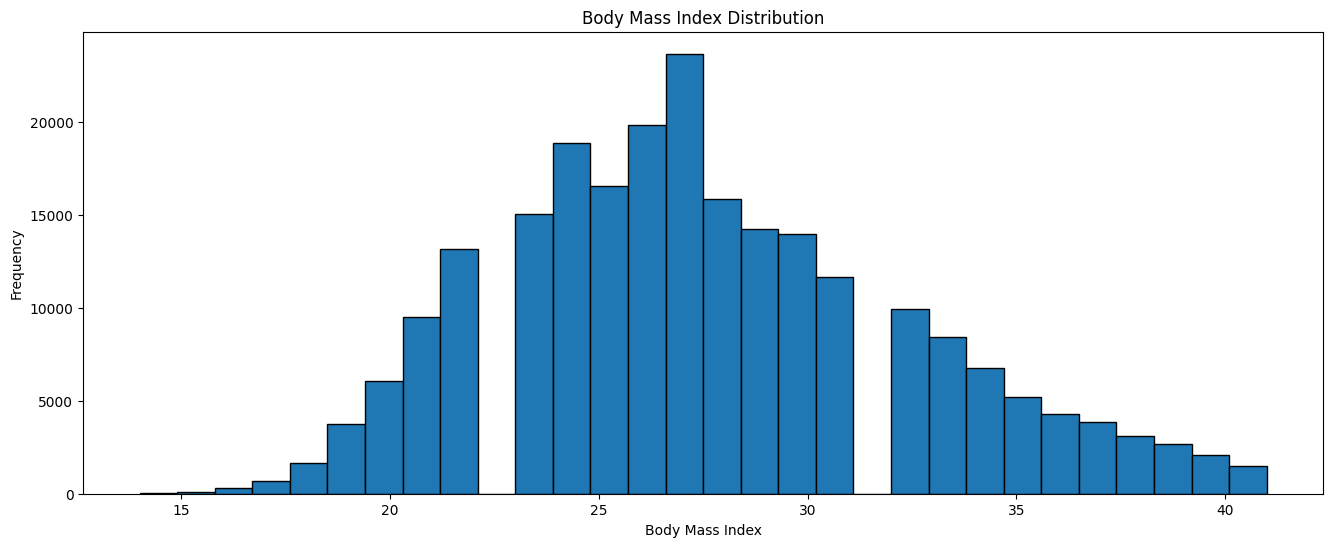

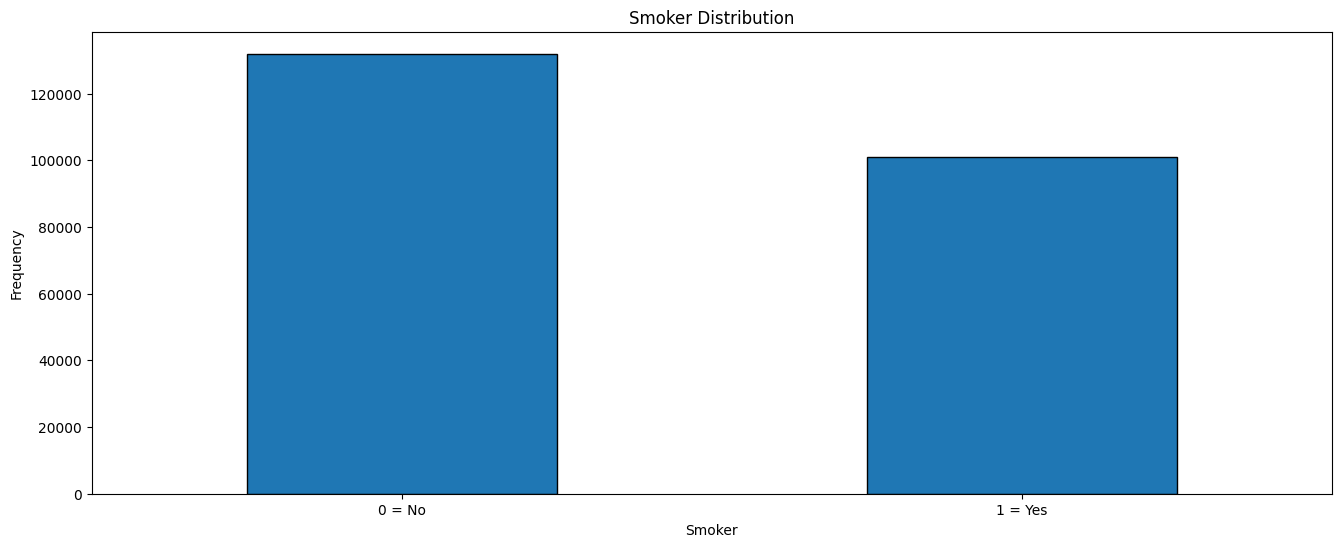

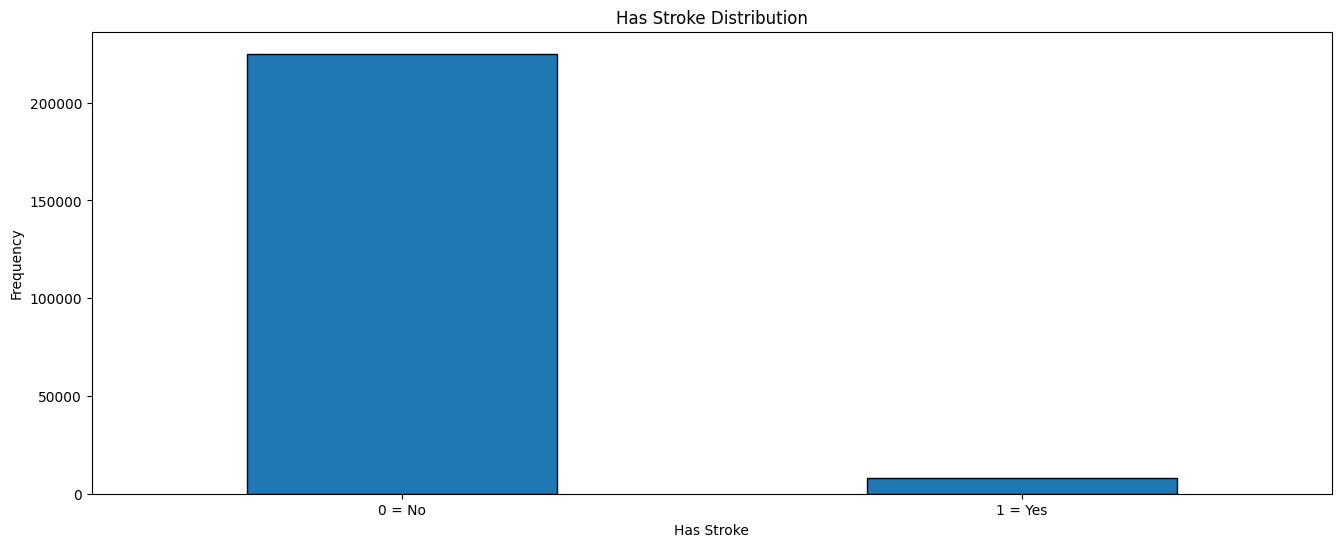

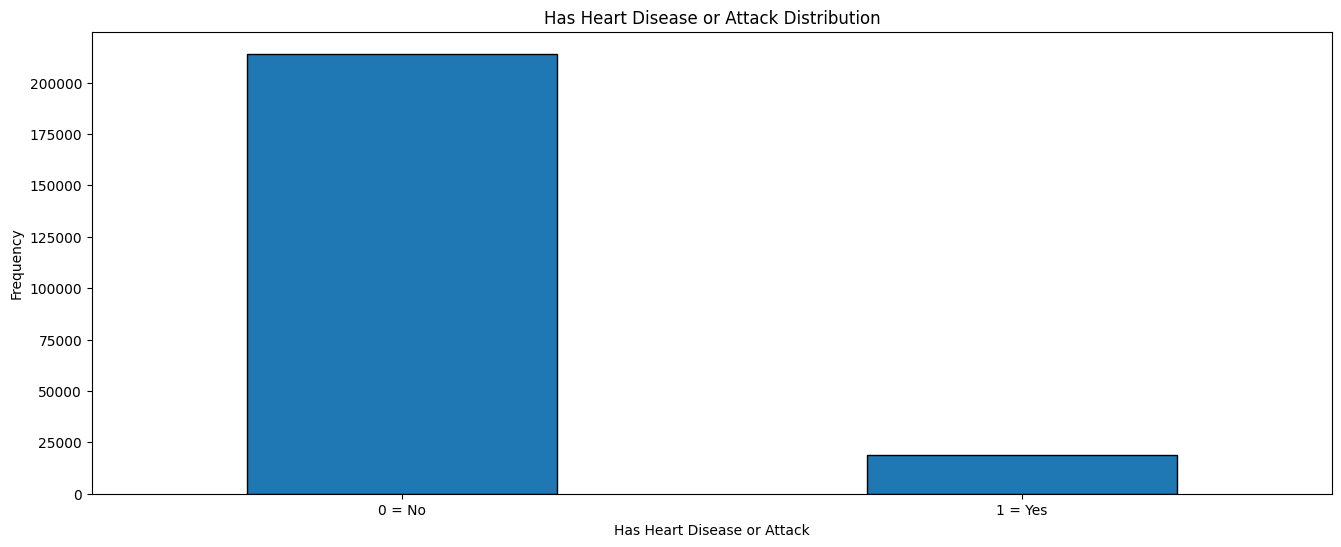

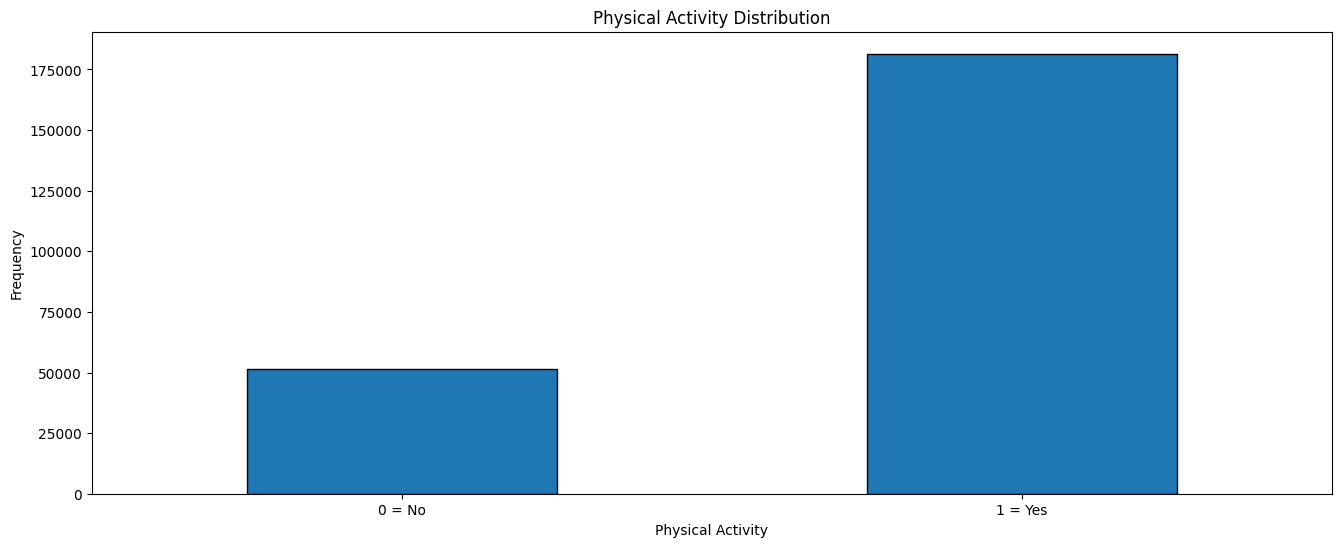

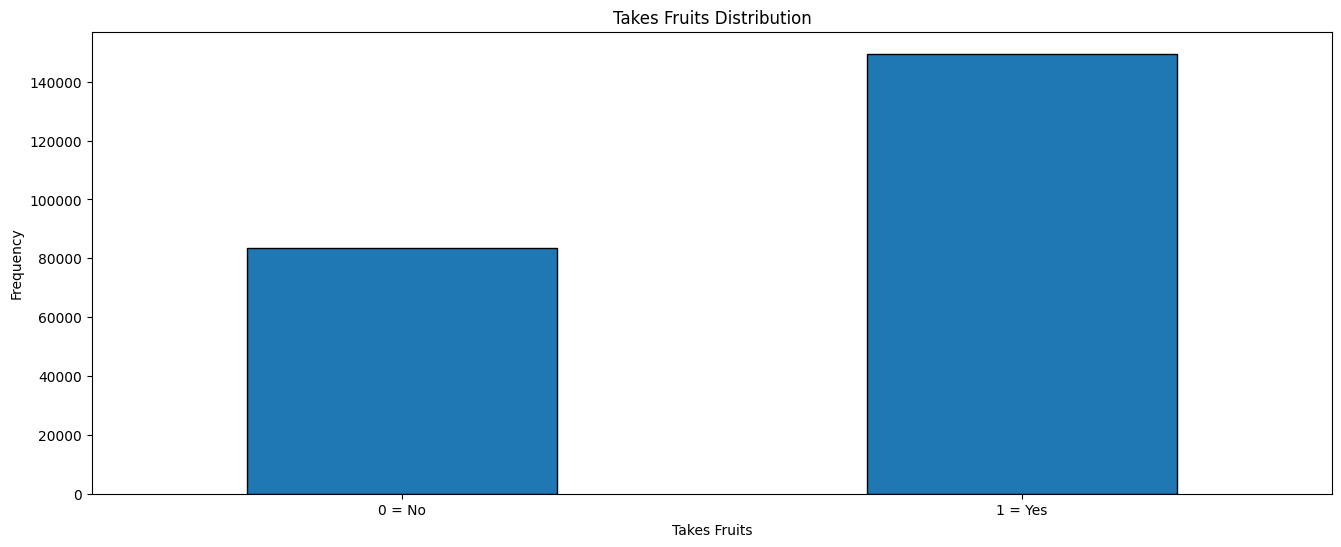

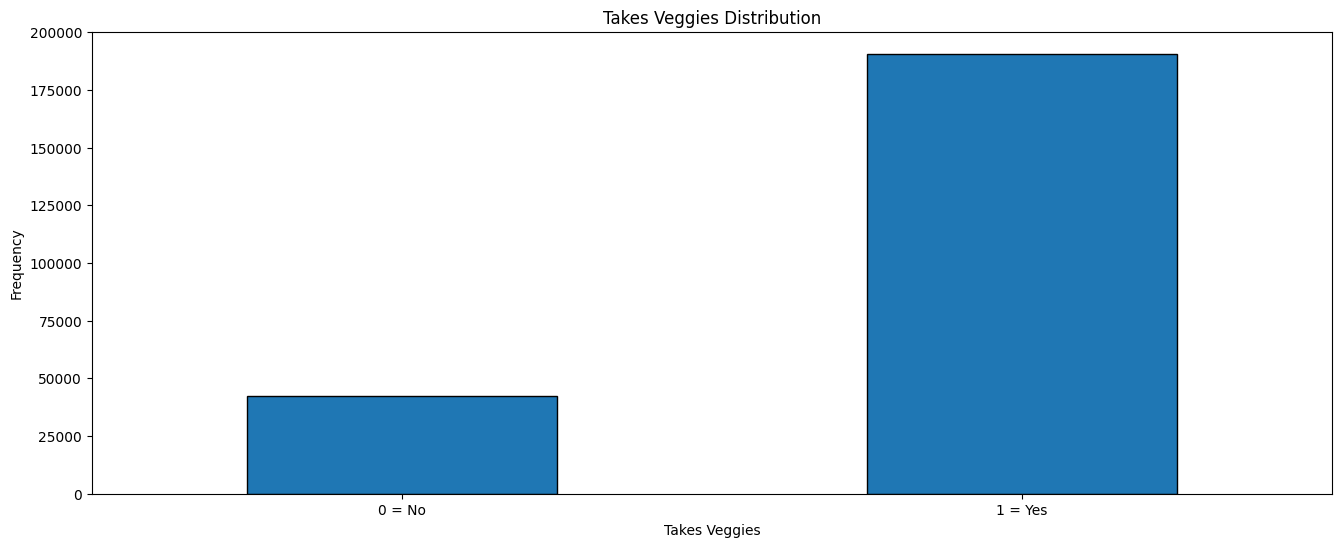

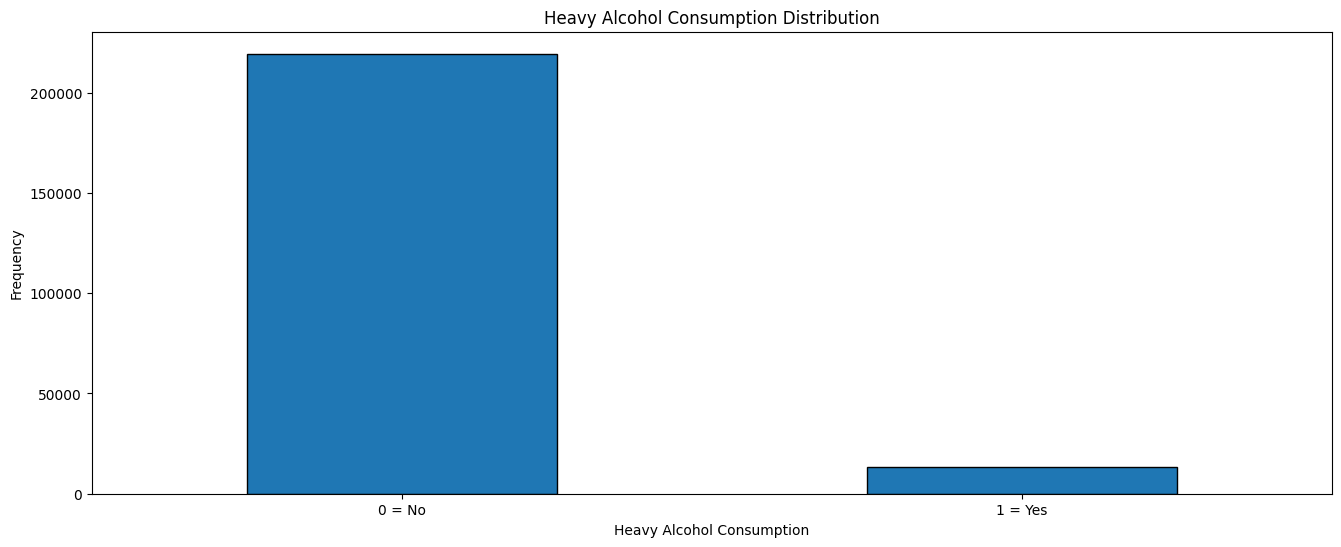

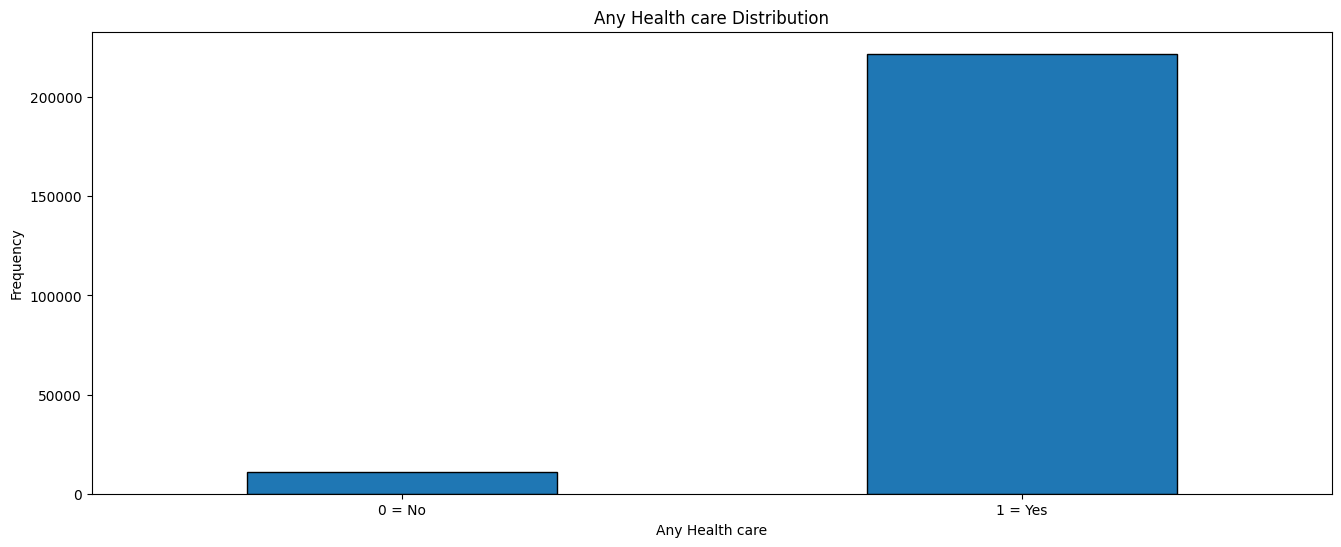

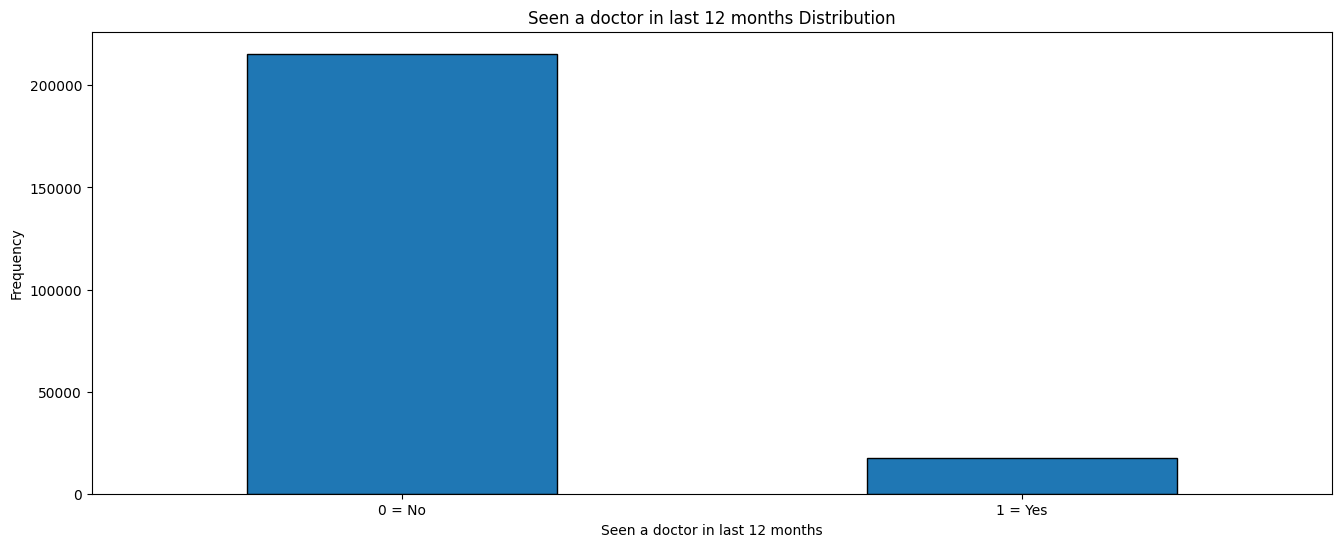

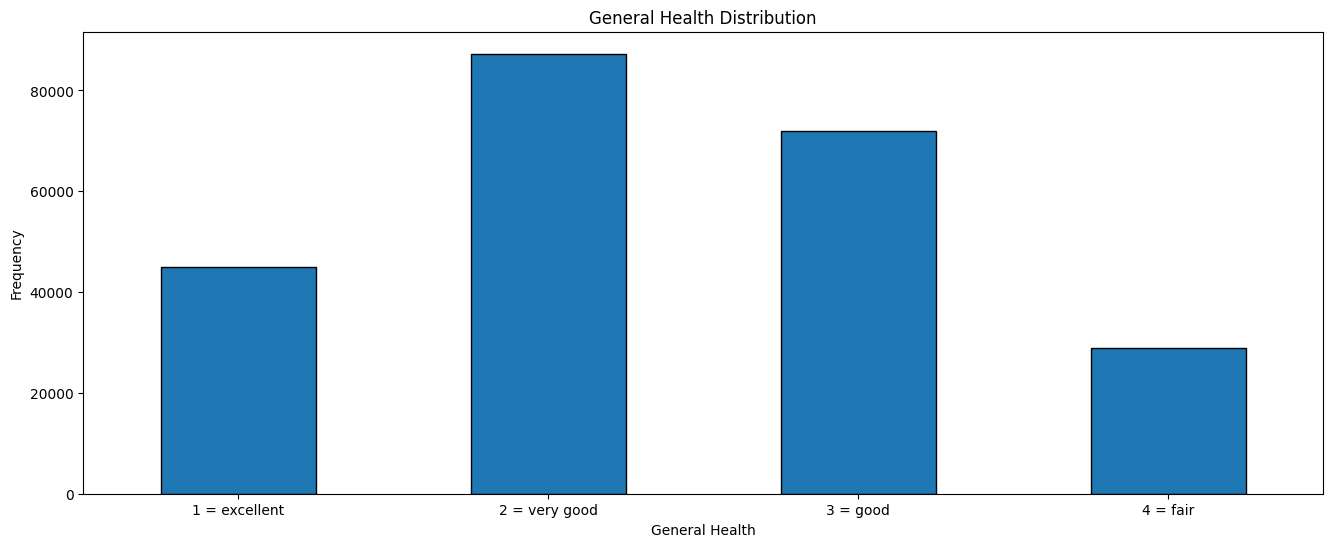

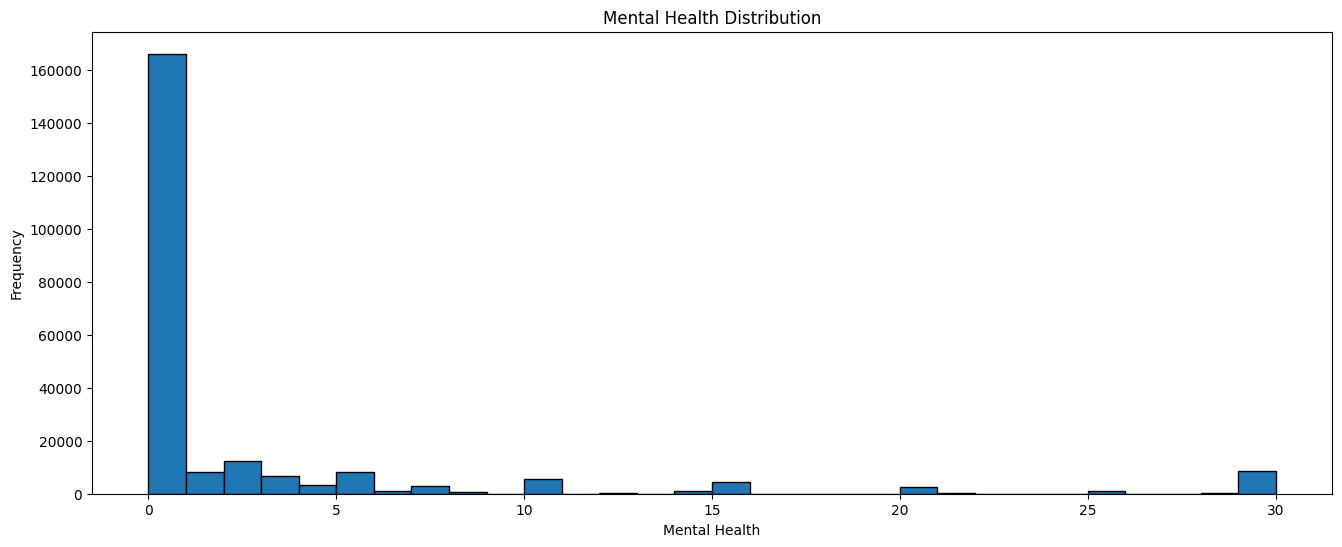

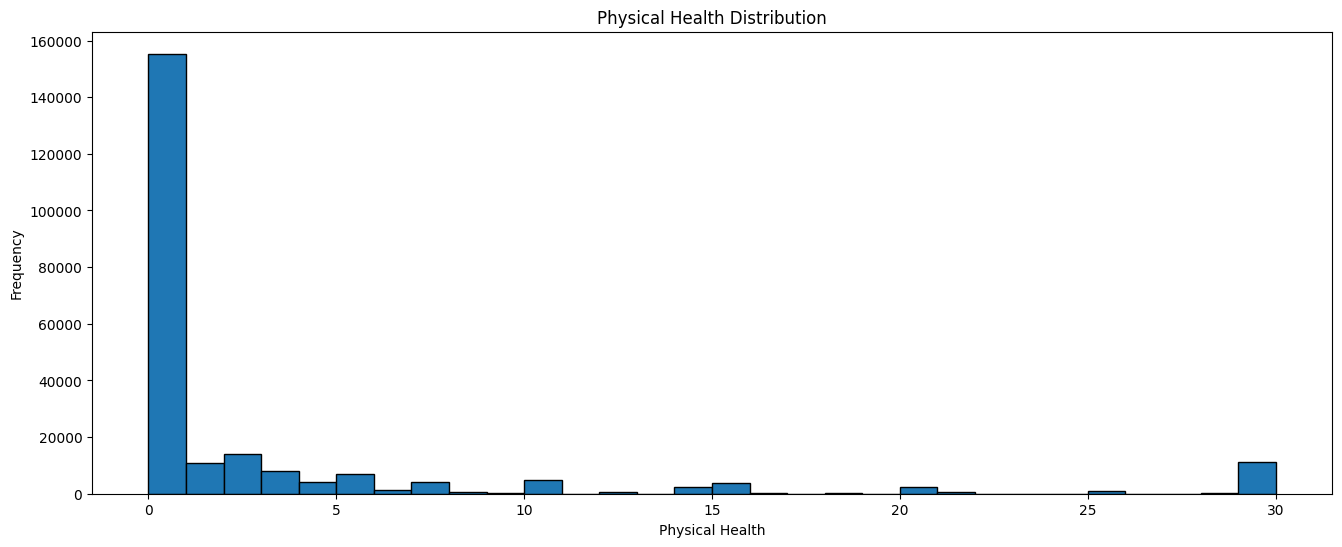

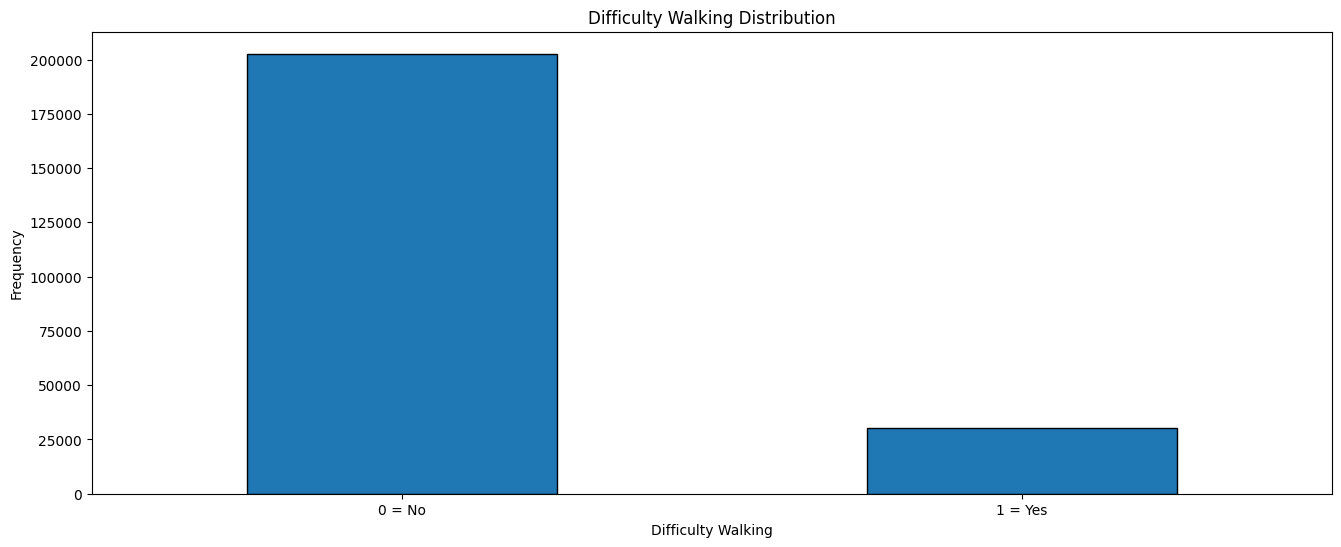

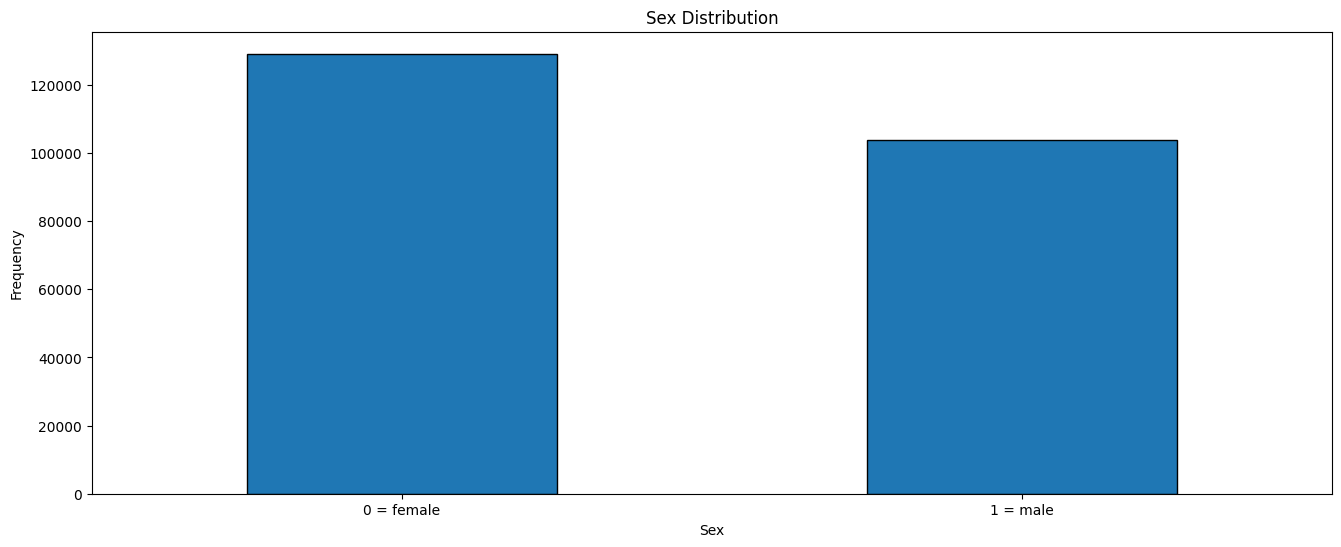

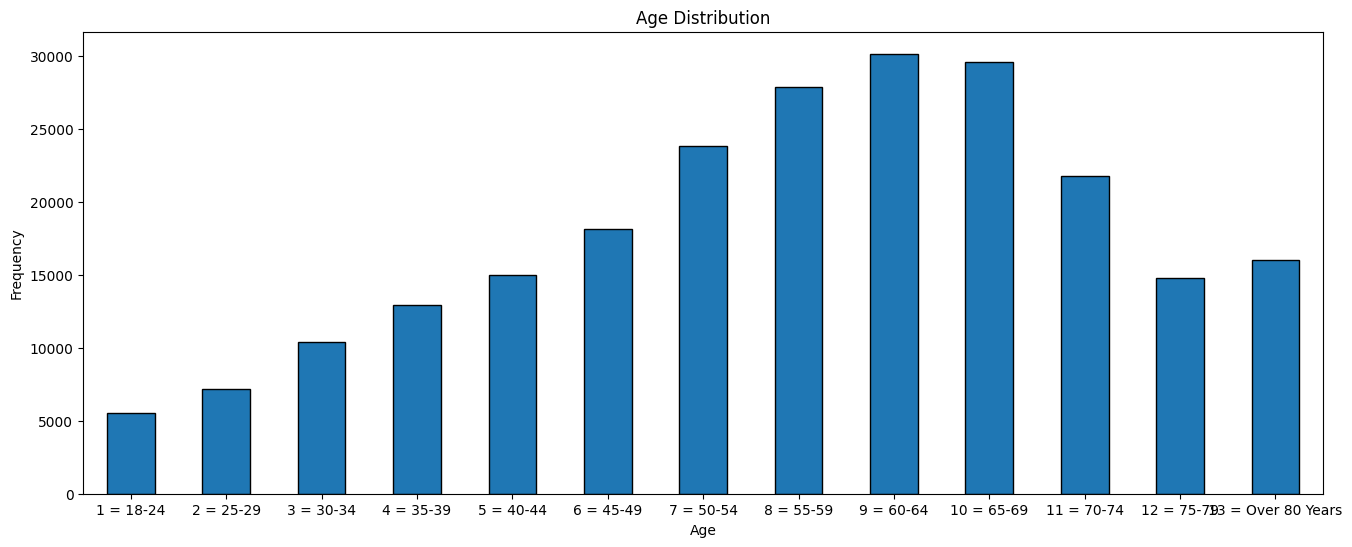

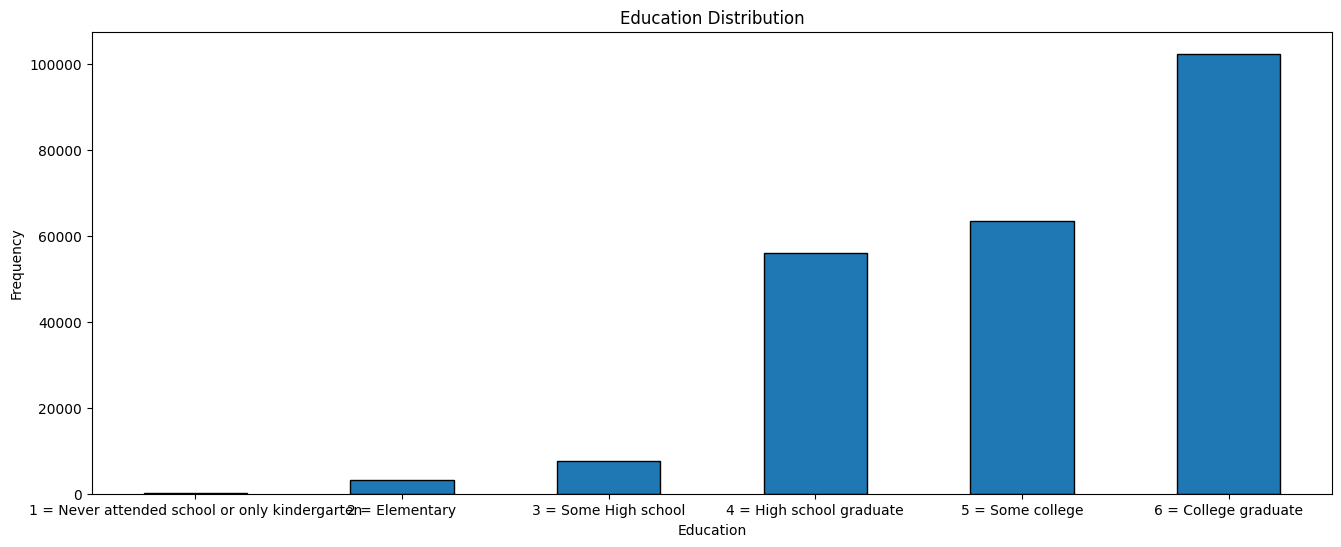

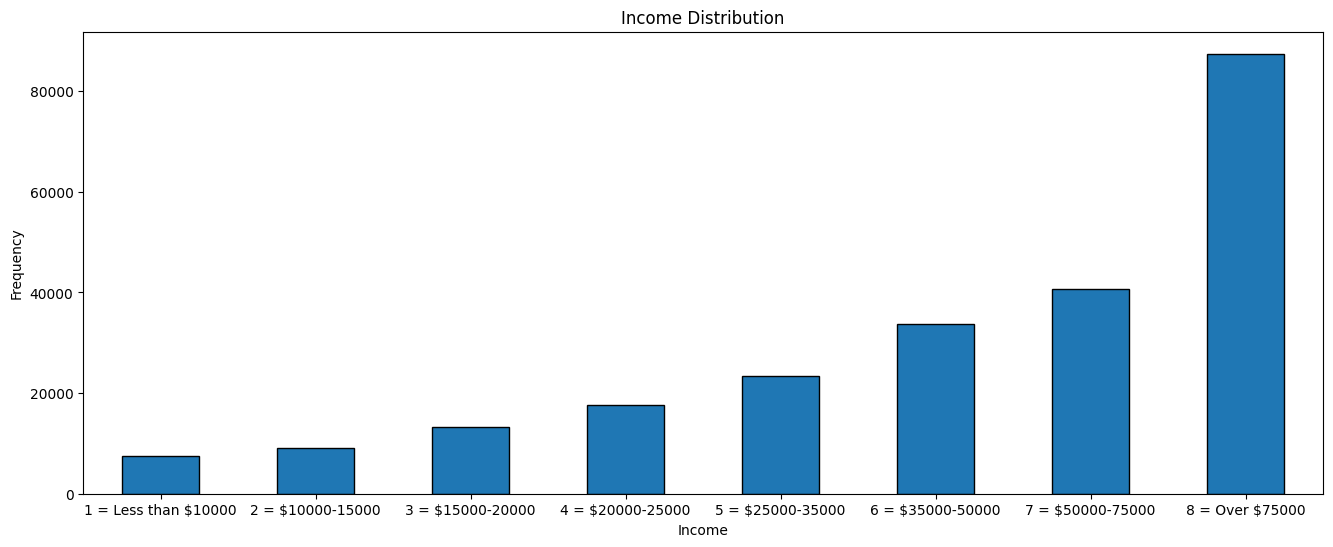

In [ ]:

#Define column metadata
columns_info = {
    'Diabetes_binary': ('0 = No diabetes,1 = Prediabetes,2 = Diabetes', 'Diabetes status', 'Diabetes status Distribution'),
    'HighBP': ('0 = No high BP,1 = High BP', 'Blood pressure level', 'Blood pressure level Distribution'),
    'HighChol': ('0 = No high cholesterol,1 = High cholesterol', 'Cholesterol level', 'Cholesterol level Distribution'),
    'CholCheck': ('0 = no cholesterol check in 5 years,1 = yes cholesterol check in 5 years', 'Cholesterol check', 'Cholesterol check Distribution'),
    'BMI': ('Data as it is', 'Body Mass Index', 'Body Mass Index Distribution'),
    'Smoker': ('0 = No,1 = Yes', 'Smoker', 'Smoker Distribution'),
    'Stroke': ('0 = No,1 = Yes', 'Has Stroke', 'Has Stroke Distribution'),
    'HeartDiseaseorAttack': ('0 = No,1 = Yes', 'Has Heart Disease or Attack', 'Has Heart Disease or Attack Distribution'),
    'PhysActivity': ('0 = No,1 = Yes', 'Physical Activity', 'Physical Activity Distribution'),
    'Fruits': ('0 = No,1 = Yes', 'Takes Fruits', 'Takes Fruits Distribution'),
    'Veggies': ('0 = No,1 = Yes', 'Takes Veggies', 'Takes Veggies Distribution'),
    'HvyAlcoholConsump': ('0 = No,1 = Yes', 'Heavy Alcohol Consumption', 'Heavy Alcohol Consumption Distribution'),
    'AnyHealthcare': ('0 = No,1 = Yes', 'Any Health care', 'Any Health care Distribution'),
    'NoDocbcCost': ('0 = No,1 = Yes', 'Seen a doctor in last 12 months', 'Seen a doctor in last 12 months Distribution'),
    'GenHlth': ('1 = excellent,2 = very good,3 = good,4 = fair', 'General Health', 'General Health Distribution'),
    'MentHlth': ('0 = No,1 = Yes', 'Mental Health', 'Mental Health Distribution'),
    'PhysHlth': ('Data as it is', 'Physical Health', 'Physical Health Distribution'),
    'DiffWalk': ('0 = No,1 = Yes', 'Difficulty Walking', 'Difficulty Walking Distribution'),
    'Sex': ('0 = female,1 = male', 'Sex', 'Sex Distribution'),
    'Age': ('1 = 18-24,2 = 25-29,3 = 30-34,4 = 35-39,5 = 40-44,6 = 45-49,7 = 50-54,8 = 55-59,9 = 60-64,10 = 65-69,11 = 70-74,12 = 75-79,13 = Over 80 Years', 'Age', 'Age Distribution'),
    'Education': ('1 = Never attended school or only kindergarten,2 = Elementary,3 = Some High school,4 = High school graduate,5 = Some college,6 = College graduate', 'Education', 'Education Distribution'),
    'Income': ('1 = Less than $10000,2 = $10000-15000,3 = $15000-20000,4 = $20000-25000,5 = $25000-35000,6 = $35000-50000,7 = $50000-75000,8 = Over $75000', 'Income', 'Income Distribution')
}

# Create plots
for column, (x_labels, x_label, title) in columns_info.items():
    plt.figure(figsize=(16, 6))

    if column in ['BMI', 'MentHlth', 'PhysHlth']:
        plt.hist(data[column].dropna(), bins=30, edgecolor='k')
    elif 'Data as it is' in x_labels:
        plt.hist(data[column].dropna(), bins=30, edgecolor='k')
    else:
        value_counts = data[column].value_counts().sort_index()
        value_counts.plot(kind='bar', edgecolor='k')
        labels = x_labels.split(',')
        if len(labels) == len(value_counts):
            plt.xticks(ticks=range(len(value_counts)), labels=labels, rotation=0)
        else:
            plt.xticks(ticks=range(len(value_counts)), rotation=0)

    plt.xlabel(x_label)
    plt.ylabel('Frequency')
    plt.title(title)
    plt.show()

1. The majority of the sample population, approximately 200,000 individuals, are in the "No diabetes" category.The dataset shows a clear imbalance with a high number of non-diabetic individuals.
2. The majority of individuals, around 140,000, have no high blood pressure (BP).This indicates that most of the sample population does not suffer from high blood pressure
3. The bar chart shows that there are approximately 135,000 individuals without high cholesterol and 95,000 individuals with high cholesterol in the dataset.
4. The bar chart shows that, within a 5-year period, approximately 8,000 individuals did not have a cholesterol check while roughly 225,000 individuals did.
5. The histogram reveals that the BMI values in the dataset follow an approximately normal distribution, with a peak around a BMI of 27 and a slight right skew. This pattern indicates that most individuals in the dataset fall within a relatively average BMI range, with a smaller proportion having higher BMI values
6. The dataset shows that a larger proportion of individuals are non-smokers (approximately 130,000) compared to smokers (approximately 100,000)
7. The dataset indicates that significantly fewer individuals have experienced a stroke (approximately 8,000) compared to those who have not (approximately 225,000).
8. The dataset shows that a significantly smaller portion of individuals have experienced heart disease or a heart attack (approximately 20,000) compared to those who have not (approximately 210,000).
9. The dataset illustrates that a significantly larger portion of individuals engage in physical activity (approximately 180,000) compared to those who do not (approximately 50,000)
10. The dataset indicates that a significantly larger portion of individuals consume fruits (approximately 150,000) compared to those who do not (approximately 85,000).
11. The dataset shows that a significantly larger portion of individuals consume vegetables (approximately 190,000) compared to those who do not (approximately 40,000)
12. The dataset shows that a significantly smaller portion of individuals engage in heavy alcohol consumption (approximately 10,000) compared to those who do not (approximately 220,000).
13. The dataset reveals that a significantly larger portion of individuals have access to any healthcare (approximately 220,000) compared to those who do not (approximately 10,000).
14. The dataset reveals that a significantly larger portion of individuals have seen a doctor in the last 12 months (approximately 215,000) compared to those who have not (approximately 15,000).
15. The dataset suggests a positive trend in self-reported general health, with most individuals perceiving their health as "very good." However, a significant portion of the population still reports only "good" or "fair" health, indicating potential areas for health interventions and support
16. The dataset illustrates that a significantly larger portion of individuals do not have mental health (approximately 160,000) compared to those who  have.
17. The dataset illustrates that a significantly larger portion of individuals do not have mental health (approximately 160,000) compared to those who  have.
18. The data set show larger population are college graduates approximately 100,000
19. The dataset show a higher population of males (125,000) compared to females (105,000)
20. The dataset shows that a larger pupulation earn over $ 75,000 approximately 85,000
21. The data set shows that the larger populaton are between 55 and 69 years
22. The data set shows that  a larger population do not have a difficulty in walking  approximately 190,000 compared to those who have a difficulty in walking approximately 25,000


# Bivariate Analysis

### **1. Bivariate Analysis on Diabetes_binary vs Other Risk Factors**
Diabetes_binary, HighBP, HighChol, CholCheck, Smoker, Stroke, HeartDiseaseorAttack,
PhysActivity, Fruits, Veggies, HvyAlcoholConsump, AnyHealthcare, NoDocbcCost, DiffWalk,
Sex, Education

Crosstab between Diabetes_binary and HighBP:
HighBP              0.0    1.0
Diabetes_binary               
0.0              128872  71952
1.0                1551   2473
2.0                7495  20617

Chi-square test results: Chi2 = 15089.10, p-value = 0.00e+00



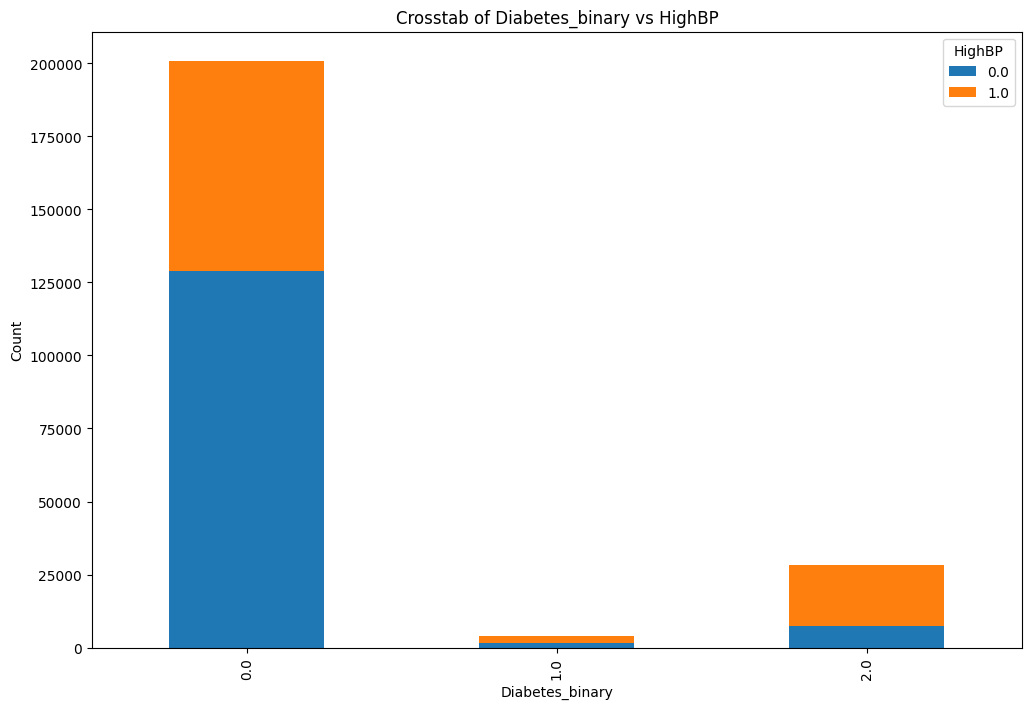

Crosstab between Diabetes_binary and HighChol:
HighChol            0.0    1.0
Diabetes_binary               
0.0              125682  75142
1.0                1547   2477
2.0                9576  18536

Chi-square test results: Chi2 = 8969.72, p-value = 0.00e+00



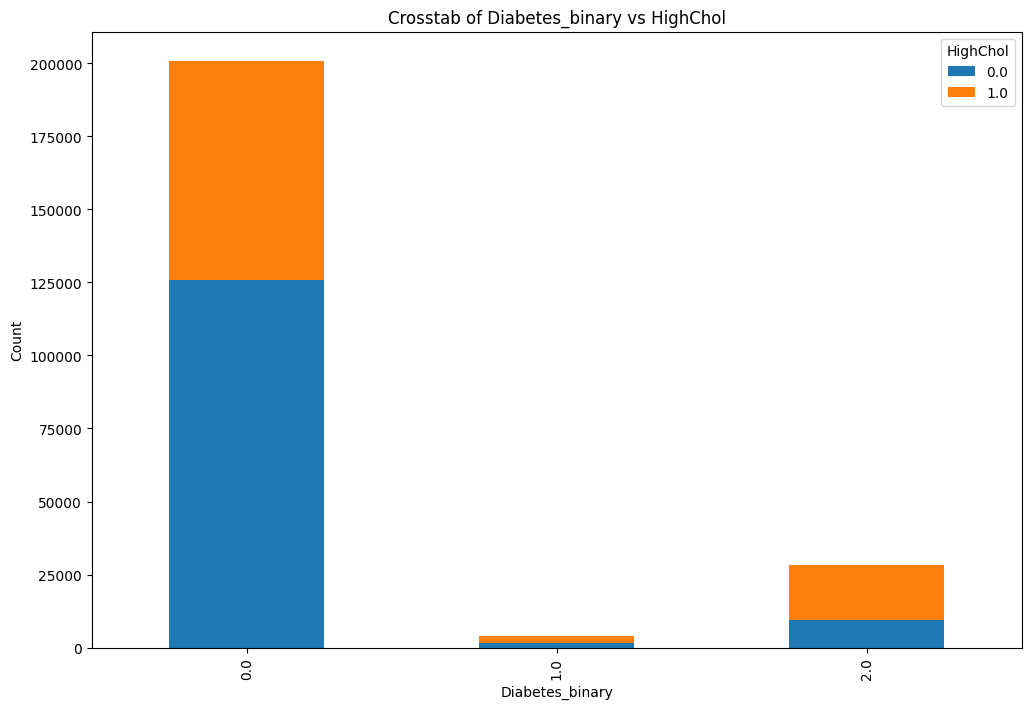

Crosstab between Diabetes_binary and CholCheck:
CholCheck         0.0     1.0
Diabetes_binary              
0.0              8758  192066
1.0                57    3967
2.0               182   27930

Chi-square test results: Chi2 = 981.92, p-value = 6.01e-214



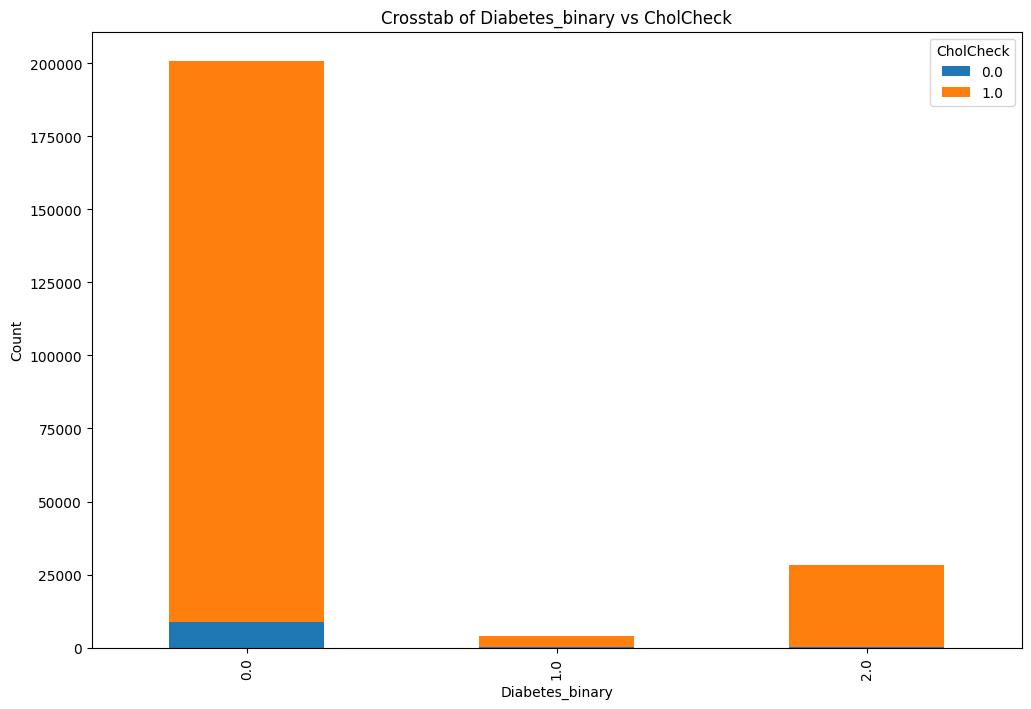

Crosstab between Diabetes_binary and Smoker:
Smoker              0.0    1.0
Diabetes_binary               
0.0              116045  84779
1.0                2094   1930
2.0               13860  14252

Chi-square test results: Chi2 = 758.07, p-value = 2.43e-165



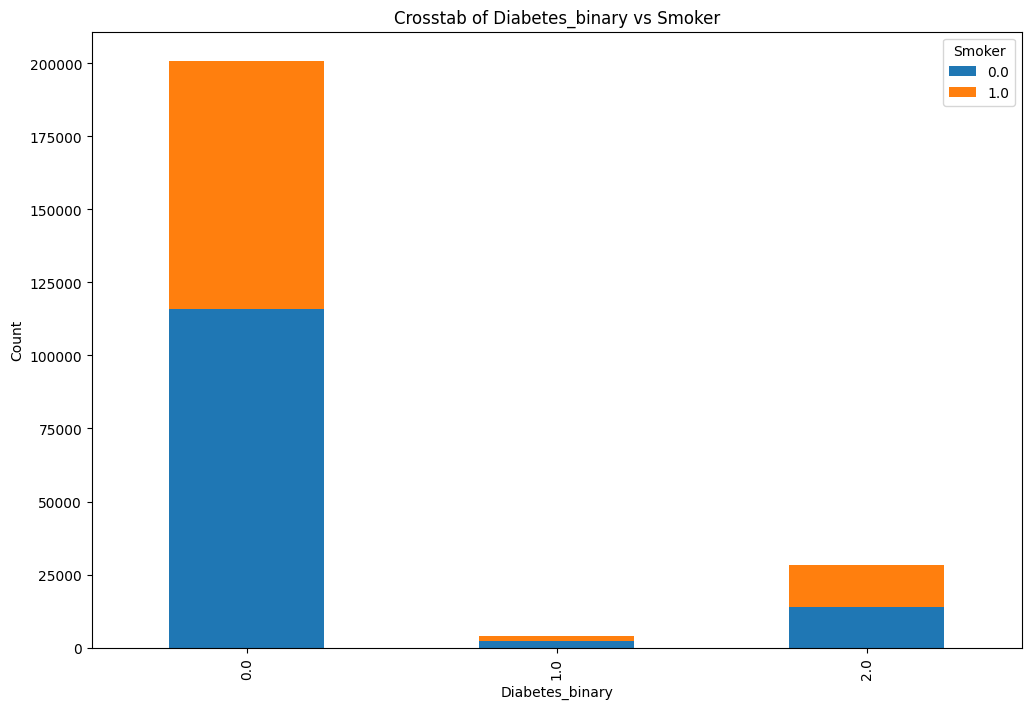

Crosstab between Diabetes_binary and Stroke:
Stroke              0.0   1.0
Diabetes_binary              
0.0              195287  5537
1.0                3824   200
2.0               25929  2183

Chi-square test results: Chi2 = 1914.14, p-value = 0.00e+00



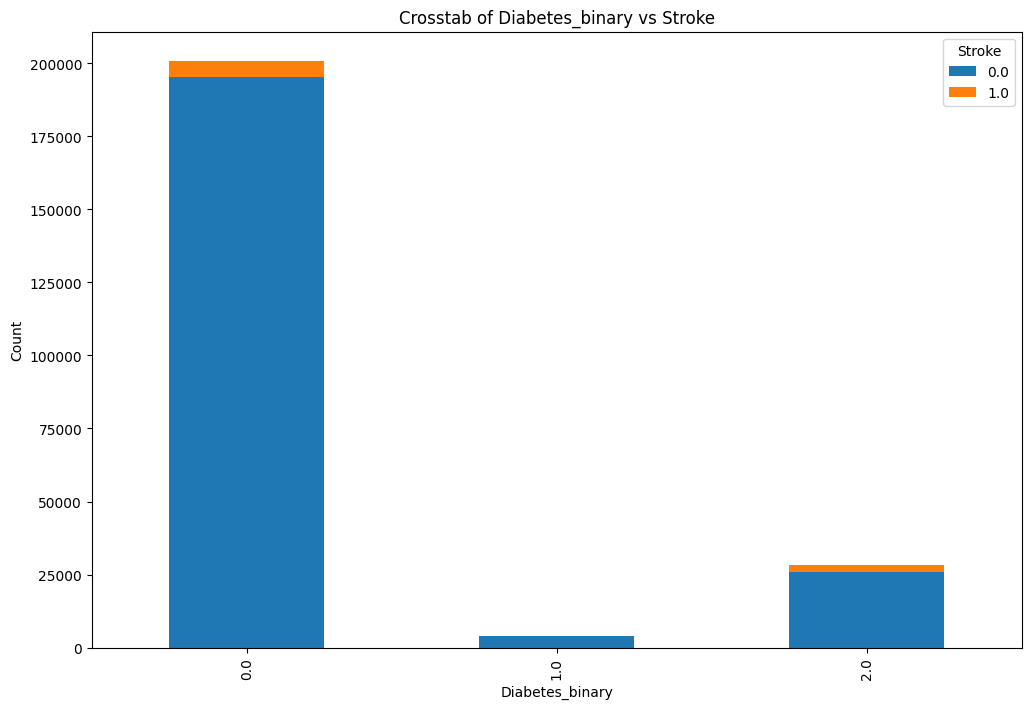

Crosstab between Diabetes_binary and HeartDiseaseorAttack:
HeartDiseaseorAttack     0.0    1.0
Diabetes_binary                    
0.0                   187854  12970
1.0                     3495    529
2.0                    22655   5457

Chi-square test results: Chi2 = 5672.79, p-value = 0.00e+00



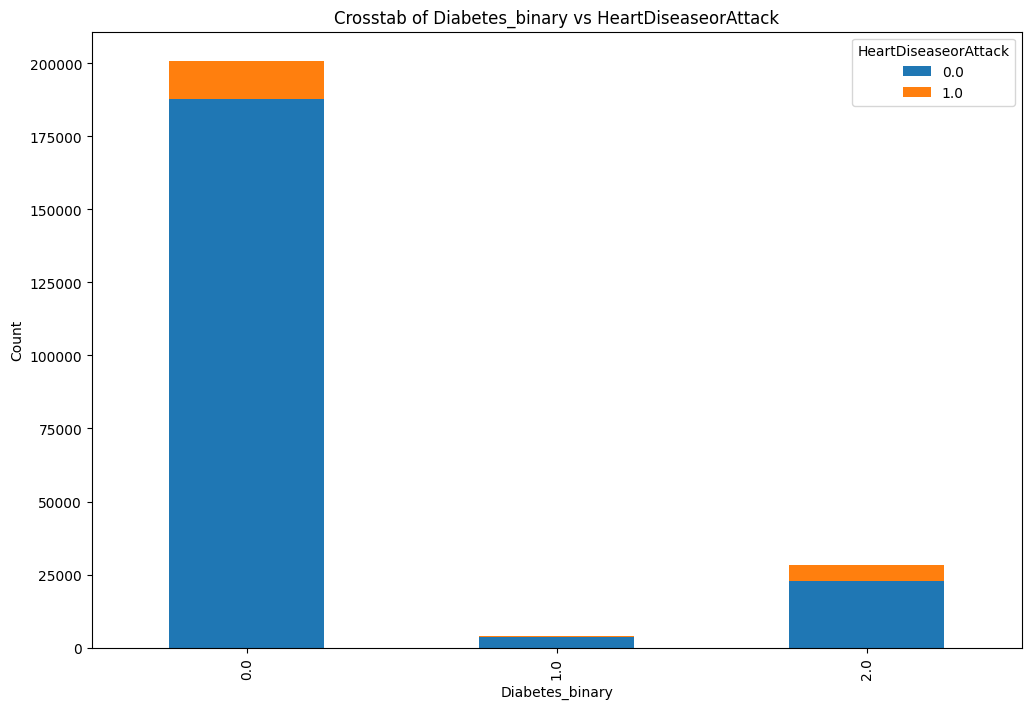

Crosstab between Diabetes_binary and AnyHealthcare:
AnyHealthcare     0.0     1.0
Diabetes_binary              
0.0              9812  191012
1.0               199    3825
2.0              1021   27091

Chi-square test results: Chi2 = 86.35, p-value = 1.77e-19



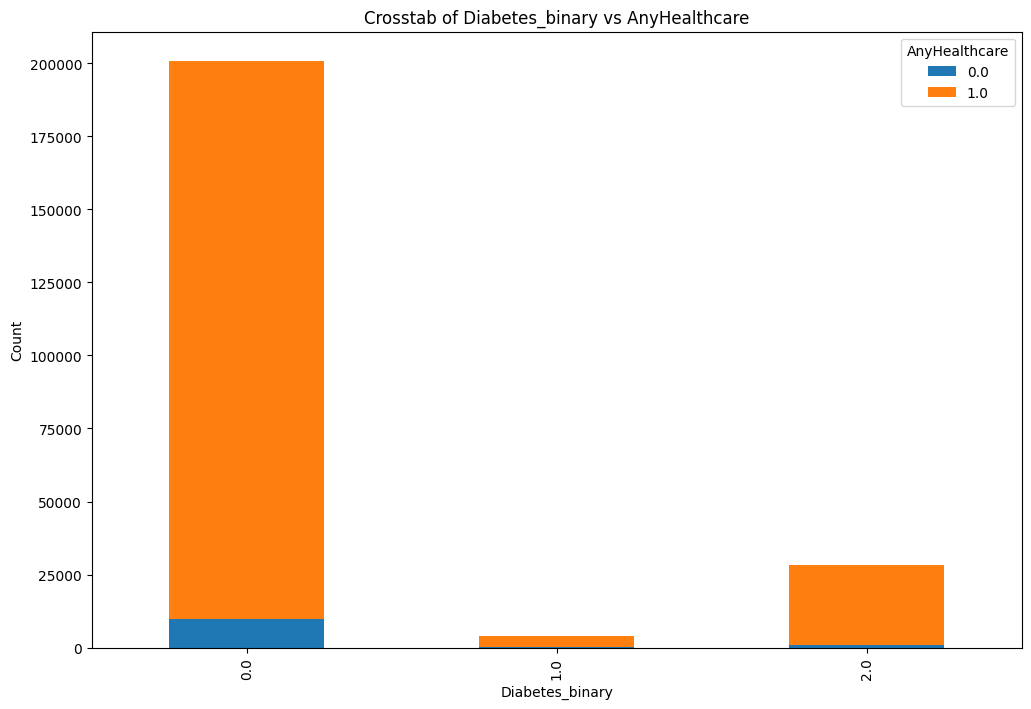

Crosstab between Diabetes_binary and NoDocbcCost:
NoDocbcCost         0.0    1.0
Diabetes_binary               
0.0              186251  14573
1.0                3567    457
2.0               25666   2446

Chi-square test results: Chi2 = 161.84, p-value = 7.20e-36



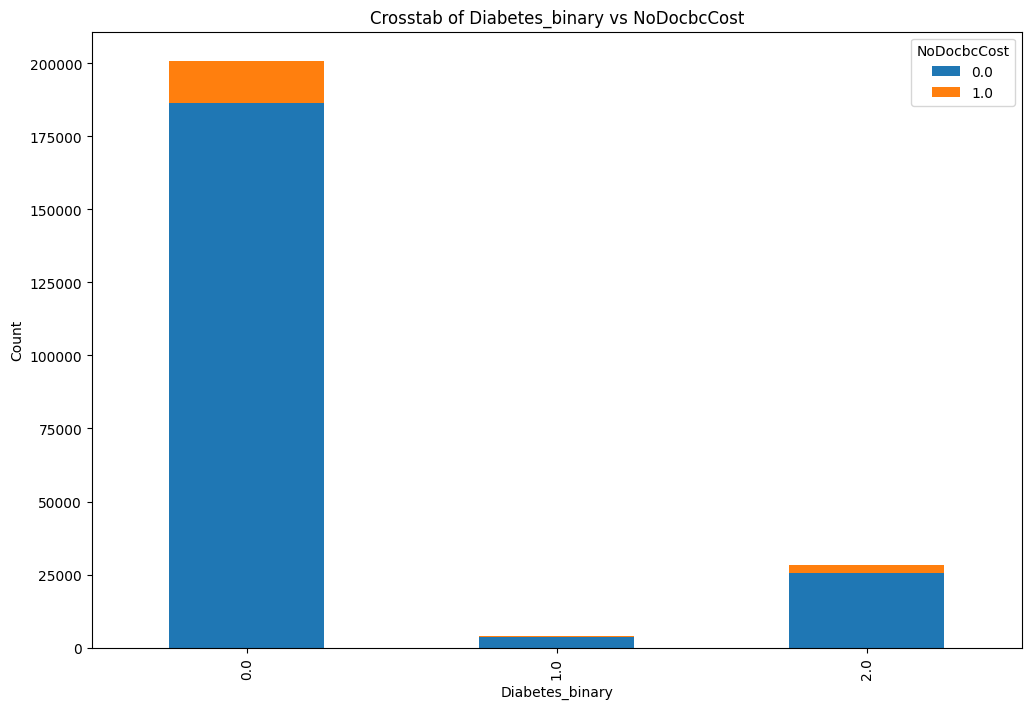

Crosstab between Diabetes_binary and DiffWalk:
DiffWalk            0.0    1.0
Diabetes_binary               
0.0              179476  21348
1.0                3126    898
2.0               20089   8023

Chi-square test results: Chi2 = 7311.24, p-value = 0.00e+00



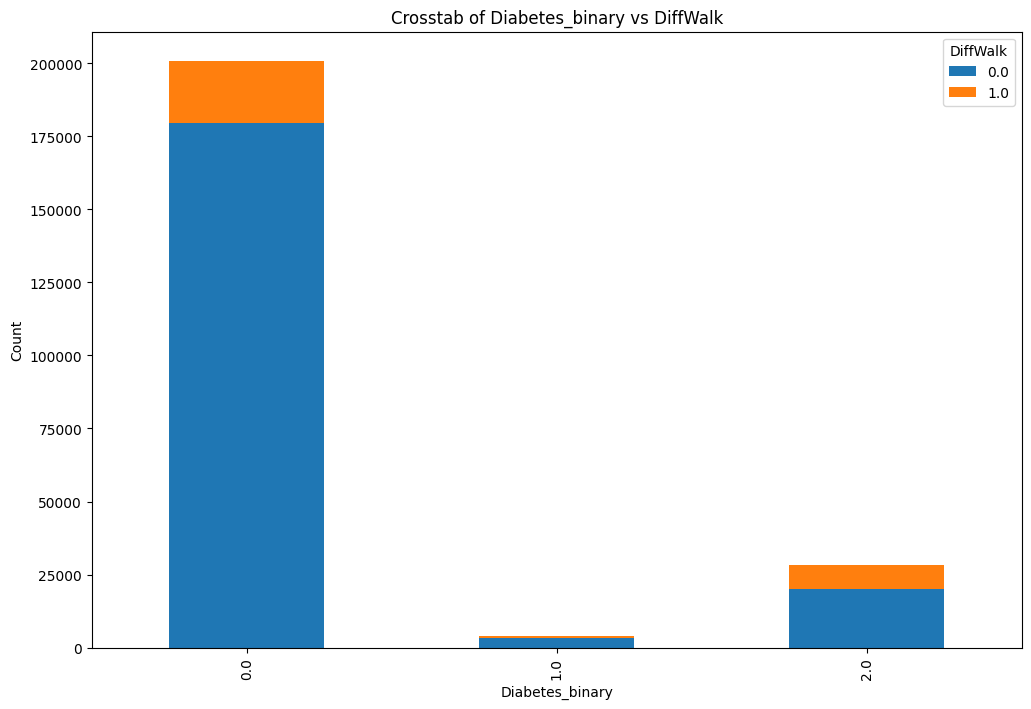

Crosstab between Diabetes_binary and HighBP:
HighBP              0.0    1.0
Diabetes_binary               
0.0              128872  71952
1.0                1551   2473
2.0                7495  20617

Chi-square test results: Chi2 = 15089.10, p-value = 0.00e+00



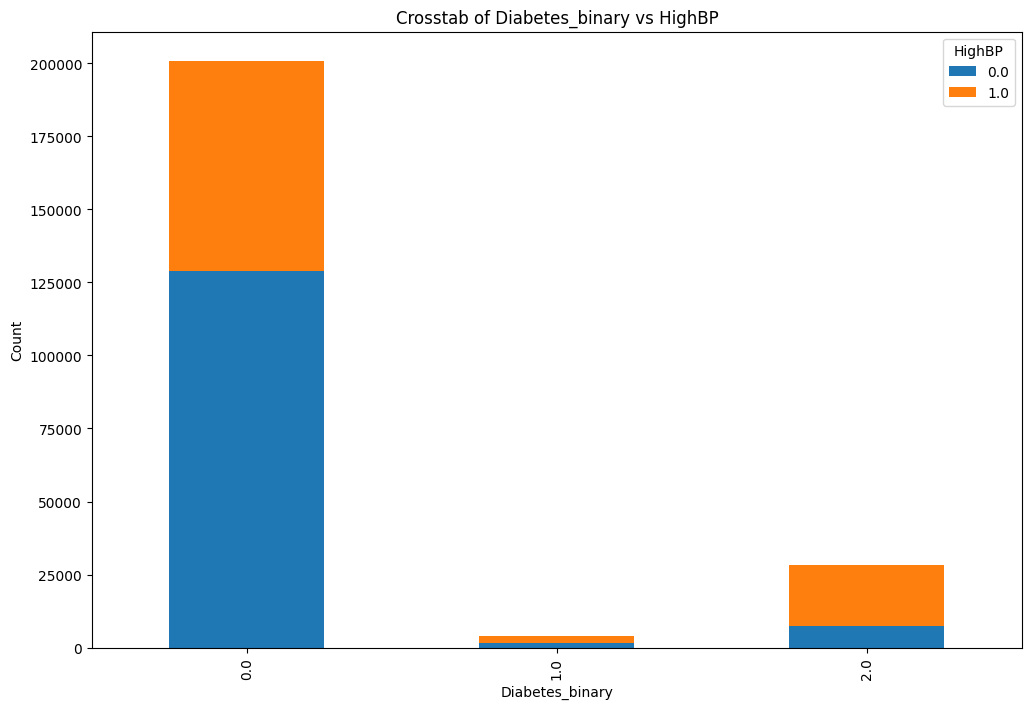

Crosstab between Diabetes_binary and Sex:
Sex                 0.0    1.0
Diabetes_binary               
0.0              112867  87957
1.0                2226   1798
2.0               14069  14043

Chi-square test results: Chi2 = 378.28, p-value = 7.19e-83



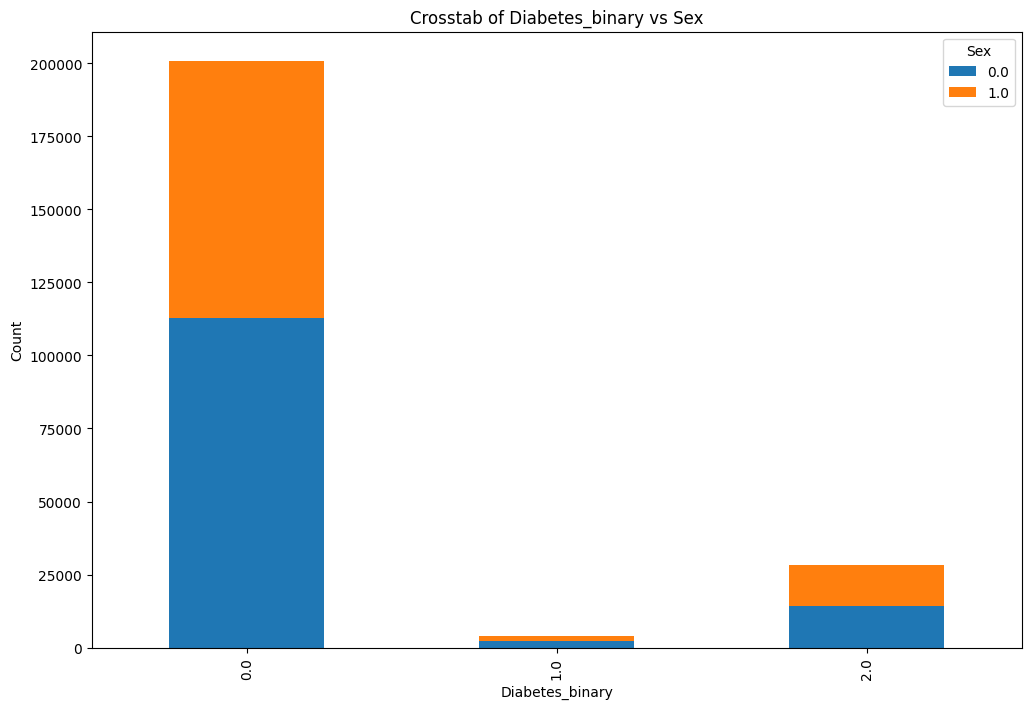

Crosstab between Diabetes_binary and Education:
Education        1.0   2.0   3.0    4.0    5.0    6.0
Diabetes_binary                                      
0.0              105  2251  5846  46248  54197  92177
1.0                1   121   252   1150   1159   1341
2.0               25   761  1572   8635   8208   8911

Chi-square test results: Chi2 = 3125.01, p-value = 0.00e+00



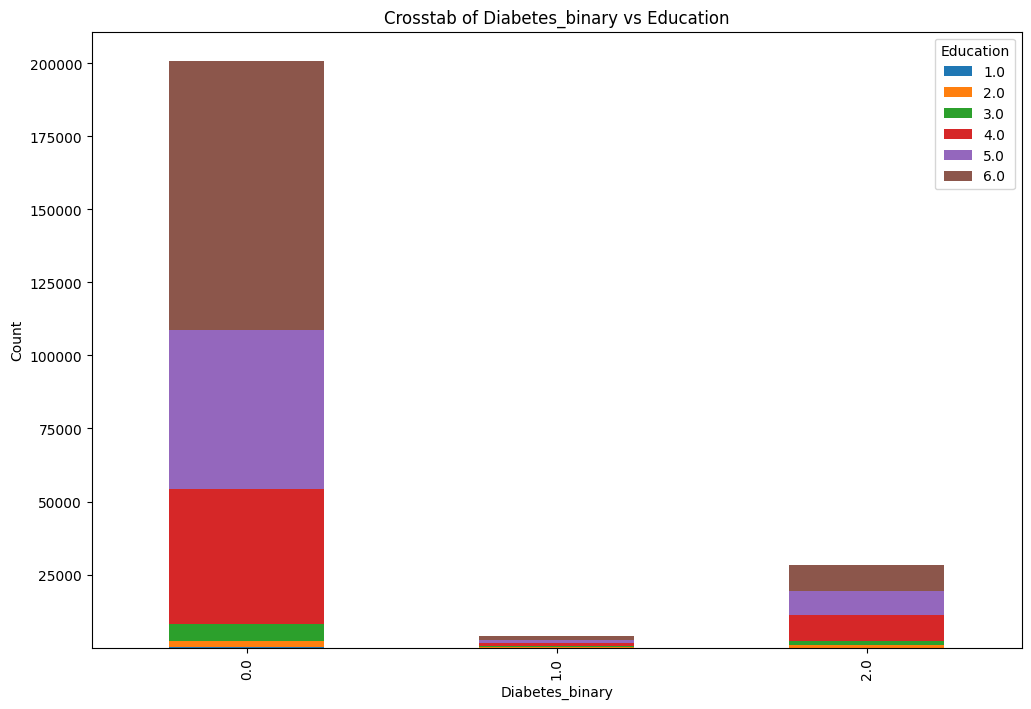

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Function to create a crosstab and perform chi-square test for categorical variables
def crosstab_analysis(data, col1, col2):
    crosstab = pd.crosstab(data[col1], data[col2])
    chi2, p, dof, expected = chi2_contingency(crosstab)


    print(f"Crosstab between {col1} and {col2}:")
    print(crosstab)
    print(f"\nChi-square test results: Chi2 = {chi2:.2f}, p-value = {p:.2e}\n")

    crosstab.plot(kind='bar', stacked=True, figsize=(12, 8))
    plt.title(f'Crosstab of {col1} vs {col2}')
    plt.xlabel(col1)
    plt.ylabel('Count')
    plt.show()

# Continuous variables for correlation matrix
continuous_vars = ['BMI', 'MentHlth', 'PhysHlth', 'Age', 'GenHlth', 'Income']

# List of categorical variables
categorical_vars = ['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'Smoker',
                    'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
                    'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
                    'DiffWalk', 'Sex', 'Education']

# Example crosstab analysis between categorical variables

crosstab_analysis(data, 'Diabetes_binary', 'HighBP')
crosstab_analysis(data, 'Diabetes_binary', 'HighChol')
crosstab_analysis(data, 'Diabetes_binary', 'CholCheck')
crosstab_analysis(data, 'Diabetes_binary', 'Smoker')
crosstab_analysis(data, 'Diabetes_binary', 'Stroke')
crosstab_analysis(data, 'Diabetes_binary', 'HeartDiseaseorAttack')
crosstab_analysis(data, 'Diabetes_binary', 'AnyHealthcare')
crosstab_analysis(data, 'Diabetes_binary', 'NoDocbcCost')
crosstab_analysis(data, 'Diabetes_binary', 'DiffWalk')
crosstab_analysis(data, 'Diabetes_binary', 'HighBP')
crosstab_analysis(data, 'Diabetes_binary', 'Sex')
crosstab_analysis(data, 'Diabetes_binary', 'Education')

# You can perform more crosstab analysis between other pairs of categorical variables as needed


### **Observations**

**Diabetes_binary vs HighBP:**

    The crosstab shows a higher proportion of diabetes cases among individuals with high blood pressure (HighBP = 1) compared to those without high blood pressure (HighBP = 0).
    Specifically, out of the total diabetic cases (Diabetes_binary = 1 and 2), 16602 individuals have high blood pressure compared to 5861 who do not.

**Diabetes_binary vs HighChol:**

    The crosstab indicates that a higher proportion of individuals with diabetes have high cholesterol (HighChol = 1) compared to those without high cholesterol (HighChol = 0).
    Specifically, out of the total diabetic cases (Diabetes_binary = 1 and 2), 12193 individuals have high cholesterol compared to 7270 who do not.

**Diabetes_binary vs CholCheck:**

    The crosstab reveals that a majority of individuals with diabetes have had their cholesterol checked in the past 5 years (CholCheck = 1).
    Specifically, out of the total diabetic cases (Diabetes_binary = 1 and 2), 19335 individuals have had their cholesterol checked compared to only 128 who have not.

**Diabetes_binary vs Smoker:**

    The crosstab shows that the proportion of diabetes cases is higher among smokers (Smoker = 1) compared to non-smokers (Smoker = 0).
    Specifically, out of the total diabetic cases (Diabetes_binary = 1 and 2), 9352 individuals are smokers compared to 10111 who are non-smokers.

**Diabetes_binary vs Stroke:**

    The crosstab indicates that a higher proportion of individuals with diabetes have had a stroke (Stroke = 1) compared to those who have not had a stroke (Stroke = 0).
    Specifically, out of the total diabetic cases (Diabetes_binary = 1 and 2), 1118 individuals have had a stroke compared to 18345 who have not.

**Diabetes_binary vs HeartDiseaseorAttack:**

    The crosstab reveals a higher proportion of diabetes cases among individuals with a history of coronary heart disease or myocardial infarction (HeartDiseaseorAttack = 1) compared to those without such history (HeartDiseaseorAttack = 0).
    Specifically, out of the total diabetic cases (Diabetes_binary = 1 and 2), 3068 individuals have a history of heart disease or attack compared to 16415 who do not.

**Diabetes_binary vs AnyHealthcare:**

    The crosstab shows that a majority of individuals with diabetes have some form of healthcare coverage (AnyHealthcare = 1).
    Specifically, out of the total diabetic cases (Diabetes_binary = 1 and 2), 18789 individuals have healthcare coverage compared to 674 who do not.

**Diabetes_binary vs NoDocbcCost:**

    The crosstab indicates that a higher proportion of diabetes cases did not have an instance where they couldn't see a doctor due to cost in the past 12 months (NoDocbcCost = 0).
    Specifically, out of the total diabetic cases (Diabetes_binary = 1 and 2), 18398 individuals did not face cost-related issues in seeing a doctor compared to 1063 who did.

**Diabetes_binary vs DiffWalk:**

    The crosstab reveals that a higher proportion of individuals with diabetes have serious difficulty walking or climbing stairs (DiffWalk = 1) compared to those who do not have such difficulty (DiffWalk = 0).
    Specifically, out of the total diabetic cases (Diabetes_binary = 1 and 2), 3085 individuals have difficulty walking compared to 16378 who do not.

**Diabetes_binary vs Sex:**

    The crosstab shows a slightly higher proportion of diabetes cases among males (Sex = 1) compared to females (Sex = 0).
    Specifically, out of the total diabetic cases (Diabetes_binary = 1 and 2), 10467 are males compared to 8996 who are females.

**Diabetes_binary vs Education:**

    The crosstab indicates that the majority of diabetes cases are among individuals with some college education or higher (Education levels 4.0, 5.0, and 6.0).
    Specifically, out of the total diabetic cases (Diabetes_binary = 1 and 2), 15708 individuals have education levels 4.0, 5.0, or 6.0 compared to 795 individuals with education levels 1.0, 2.0, or 3.0.

### **2. HighBP vs Other Variables**
Age, BMI, GenHlth, PhysHlth

Age: Check if age is associated with high blood pressure.

BMI: Analyze the relationship between BMI and high blood pressure.

PhysActivity: Determine if physical activity is associated with high blood pressure.

GenHlth: Analyze the relationship between general health and high blood pressure.

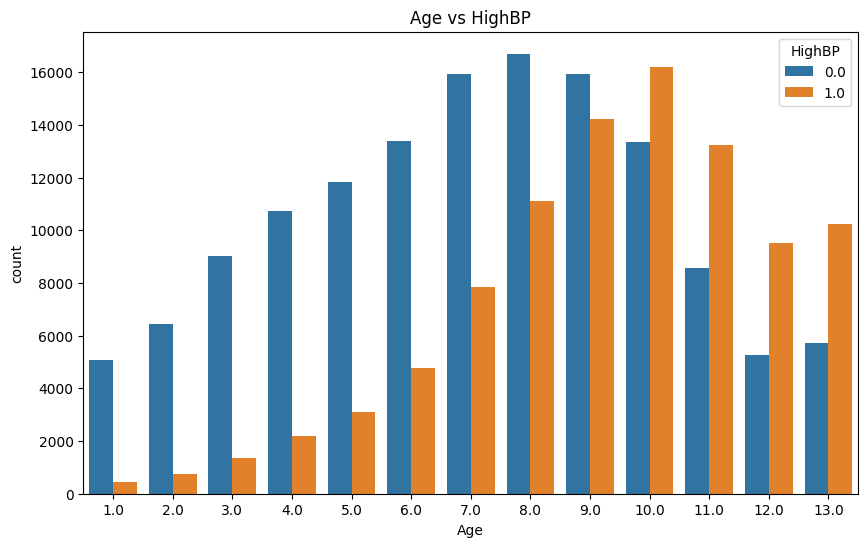

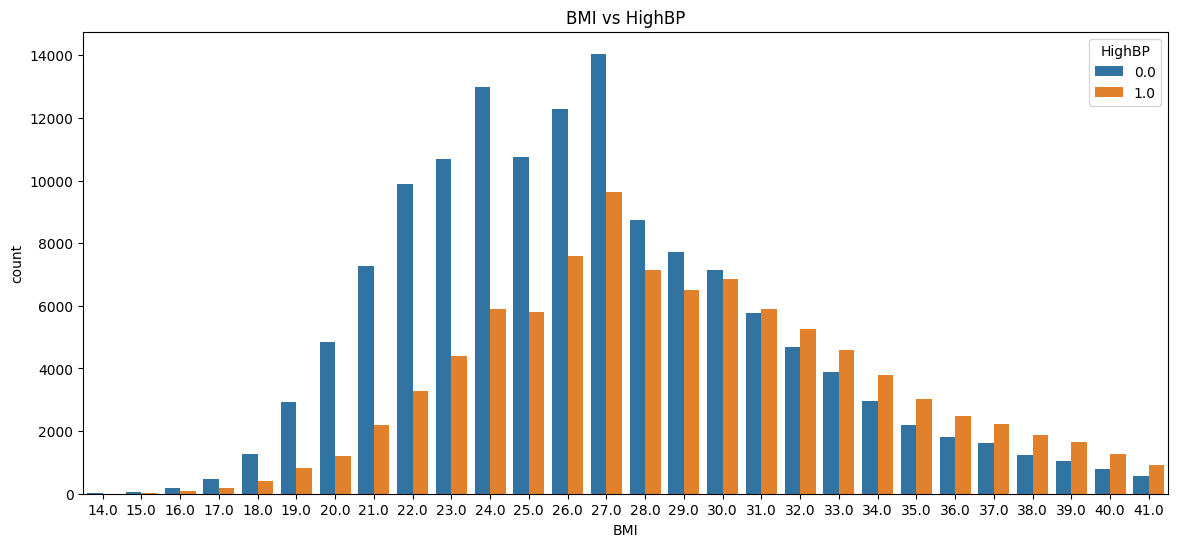

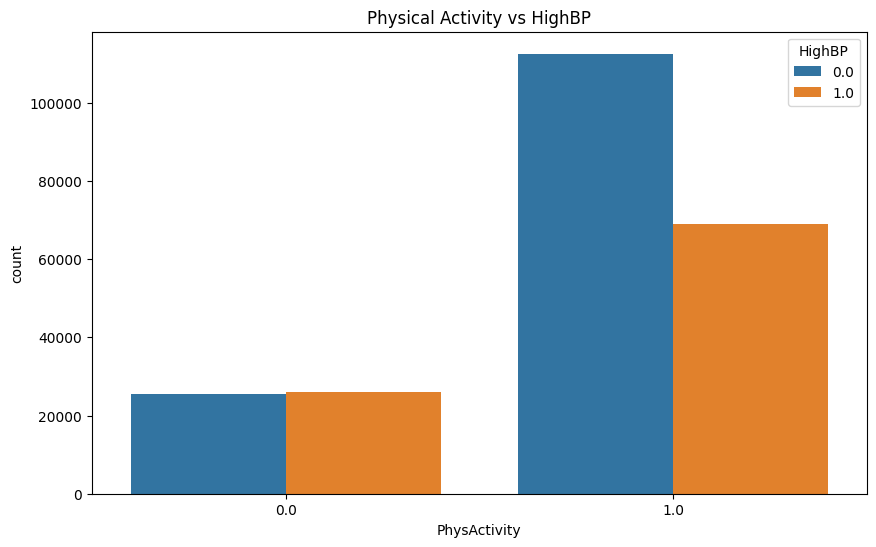

<function matplotlib.pyplot.show(close=None, block=None)>

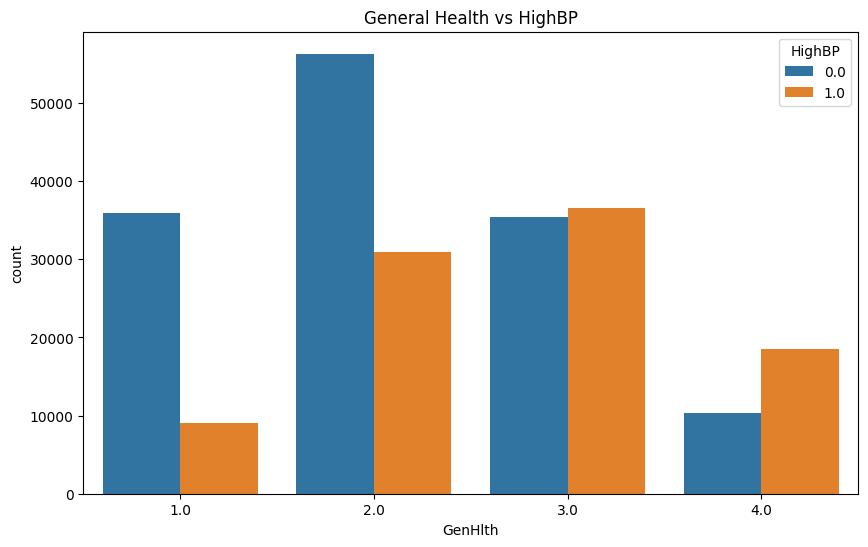

In [ ]:
#code
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `data` is your DataFrame

# 1. Age vs HighBP
plt.figure(figsize=(10, 6))
sns.countplot(x='Age', hue='HighBP', data=data)
plt.title('Age vs HighBP')
plt.show()

# 2. BMI vs HighBP
plt.figure(figsize=(14, 6))
sns.countplot(x='BMI', hue='HighBP', data=data)
plt.title('BMI vs HighBP')
plt.show()

# 3. PhysActivity vs HighBP
plt.figure(figsize=(10, 6))
sns.countplot(x='PhysActivity', hue='HighBP', data=data)
plt.title('Physical Activity vs HighBP')
plt.show()

# 4. GenHlth vs HighBP
plt.figure(figsize=(10, 6))
sns.countplot(x='GenHlth', hue='HighBP', data=data)
plt.title('General Health vs HighBP')
plt.show


### **Observation**

**HighBP vs Age:**

    The count plot indicates that a higher proportion of older individuals have high blood pressure (HighBP = 1) compared to younger individuals.
    Specifically, out of the total cases, there are more individuals with high blood pressure in higher age categories, suggesting a positive correlation between age and high blood pressure.
    Also, people of age band 8 to age band 9 (55-64)without High blood pressure are more susceptible to getting High Blood Pressure and, therefore are more likely to be diabetic

**HighBP vs BMI:**

    The count plot shows that people who have a BMI of 24 are the least likely to have high blood pressure while also having a relatively high BMI
    A BMI of 27 has the highest frequency for those with and without High Blood pressure
    Overall, people with a BMI of below 27 are less likely to have high blood pressure but people who have a BMI above 27 are screwed High blood pressure is following them like the police on subway surfers
    Specifically, individuals with a higher BMI are more likely to have high blood pressure, indicating a positive relationship between BMI and high blood pressure.

**HighBP vs PhysActivity:**

    The count plot reveals that the proportion of people who engage in physical activities are less likely to have high blood pressure compared to those who do not
    The people who engage in physical activity and have high blood pressure are more than those who do not have a high blood pressure
    The frequency of the people who engage in physical activity and don't have high blood pressure is higher than everyone with a high BP whether they work out or not

**HighBP vs GenHlth:**

    The count plot indicates that individuals who report poorer general health (higher values of GenHlth) are more likely to have high blood pressure (HighBP = 1) compared to those who report better general health.
    Specifically, there is a clear trend showing that worse general health is associated with a higher likelihood of having high blood pressure, highlighting the connection between overall health and blood pressure levels.

-------------------------------------------------------------------------------------------------------------------------------------------

### **3. HighChol vs Other Variables**
Age, BMI, GenHlth, PhysHlth

Age: Check the relationship between Age and high cholesterol.

BMI: Check the relationship between BMI and high cholesterol

PhysActivity: Determine if physical activity is associated with high cholesterol.

GenHlth: Analyze the relationship between general health and high cholesterol.

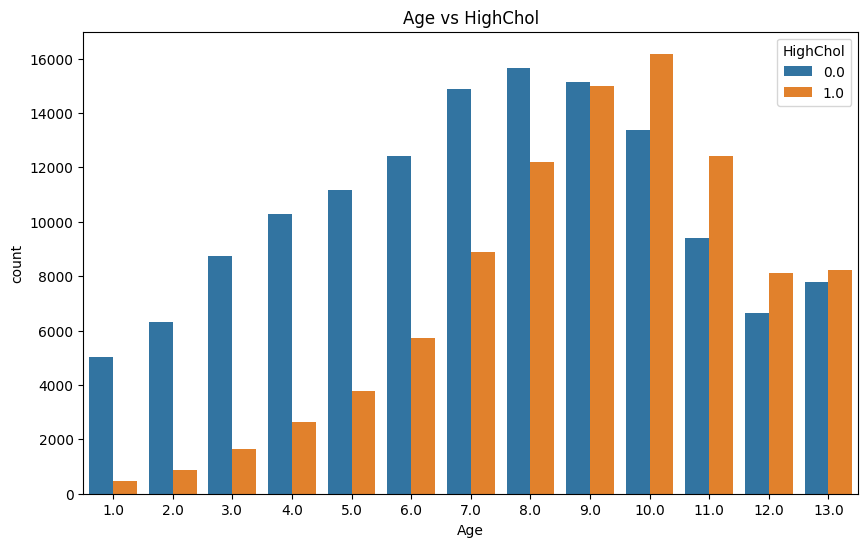

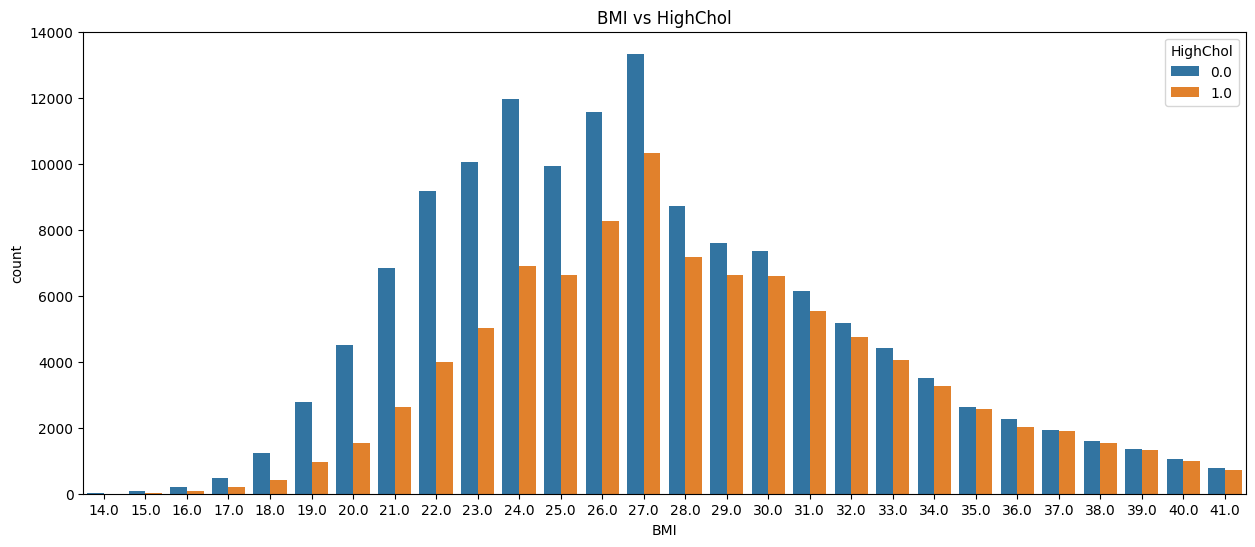

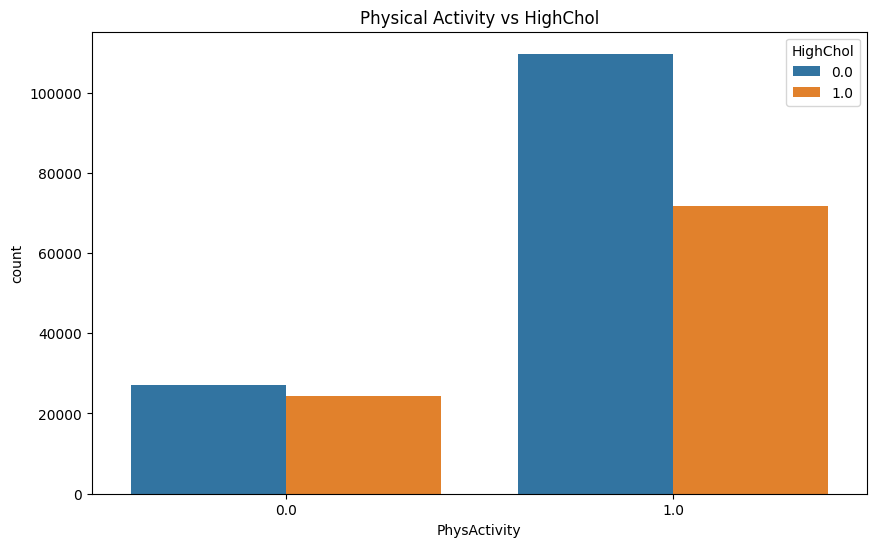

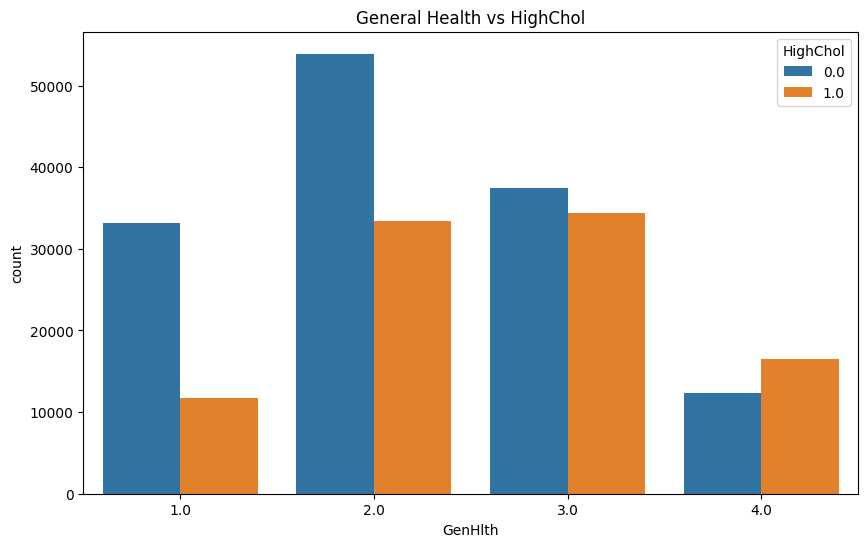

In [ ]:
# 0. Age vs HighChol
plt.figure(figsize=(10, 6))
sns.countplot(x='Age', hue='HighChol', data=data)
plt.title('Age vs HighChol')
plt.show()

# 1. BMI vs HighChol
plt.figure(figsize=(15, 6))
sns.countplot(x='BMI', hue='HighChol', data=data)
plt.title('BMI vs HighChol')
plt.show()

# 2. PhysActivity vs HighChol
plt.figure(figsize=(10, 6))
sns.countplot(x='PhysActivity', hue='HighChol', data=data)
plt.title('Physical Activity vs HighChol')
plt.show()

# 3. GenHlth vs HighChol
plt.figure(figsize=(10, 6))
sns.countplot(x='GenHlth', hue='HighChol', data=data)
plt.title('General Health vs HighChol')
plt.show()


### **Observations**

**HighCol vs Age:**

    The count plot shows that as people age their risk factor for high cholesterol increases
    When people get to the age bracket 9 (age 60 and above) their likelihood they have high cholesterol is close to a 50/50 chance
    People who are in age bracket 10 and above (ages 65 and above) have high cholesterol compared to those who do not in their age brackets

**HighCol vs BMI:**

    The count plot shows that the lower your BMI the lower your risk factor for high cholesterol
    people who have a BMI of 24 are the least likely to have high cholesterol while also having a relatively high BMI
    A BMI of 27 has the highest frequency for those with and without High cholesterol
    Overall, people with a BMI of below 27 are less likely to have high cholesterol but people who have a BMI above 27 are screwed high cholesterol has a vendetta
    Specifically, individuals with a higher BMI are more likely to have high cholesterol, indicating a positive relationship between BMI and high cholesterol.

**HighChol vs PhysActivity:**

    The count plot reveals that the proportion of people who engage in physical activities is less likely to have high cholesterol compared to those who do not.
    The people who engage in physical activity and have high cholesterol are more than those who do not have high cholesterol.
    The frequency of the people who engage in physical activity and don't have high cholesterol is higher than everyone with high cholesterol, whether they work out or not.

**HighChol vs GenHlth:**

    The count plot indicates that individuals who report poorer general health (higher values of GenHlth) are more likely to have high cholesterol (HighChol = 1) compared to those who report better general health.
    Specifically, there is a clear trend showing that worse general health is associated with a higher likelihood of having high cholesterol, highlighting the connection between overall health and cholesterol levels.

-------------------------------------------------------------------------------------------------------------------------------------------

### **4. BMI vs Other Variables**

    PhysActivity: Analyze the relationship between physical activity and BMI.
    
    GenHlth: Determine the relationship between general health and BMI.
    
    Age: Check the relationship between age and BMI.

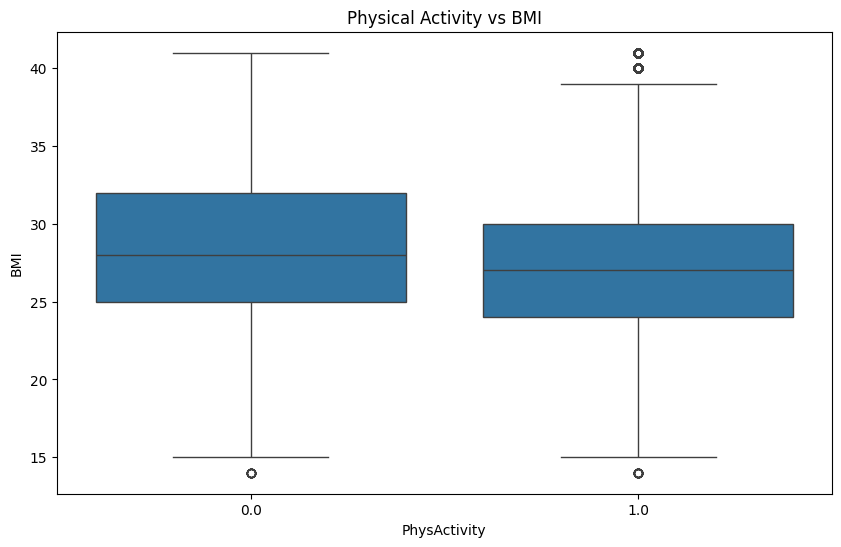

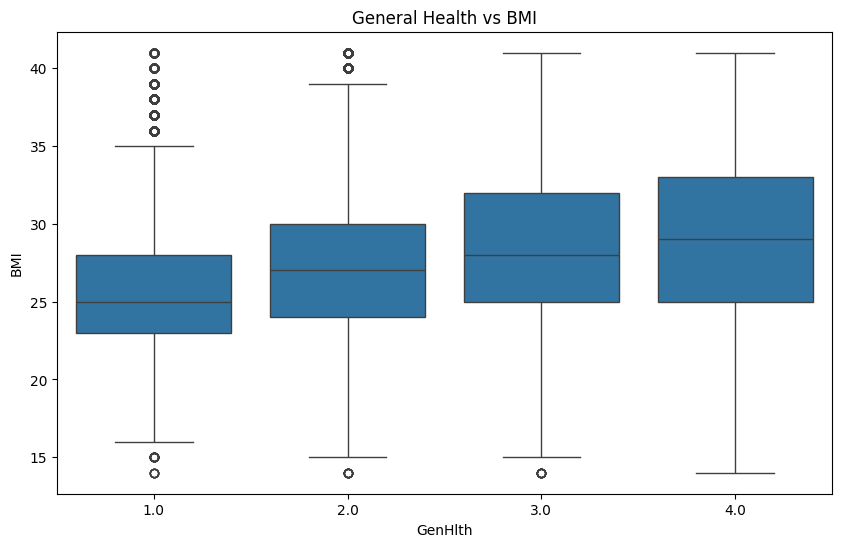

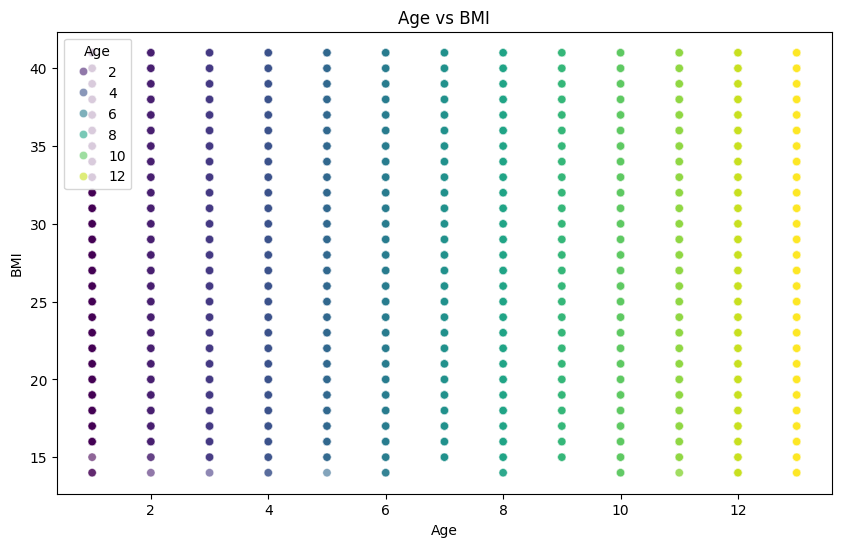

In [ ]:
#code
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `data` is your DataFrame

# 1. PhysActivity vs BMI
plt.figure(figsize=(10, 6))
sns.boxplot(x='PhysActivity', y='BMI', data=data)
plt.title('Physical Activity vs BMI')
plt.show()

# 2. GenHlth vs BMI
plt.figure(figsize=(10, 6))
sns.boxplot(x='GenHlth', y='BMI', data=data)
plt.title('General Health vs BMI')
plt.show()

# 3. Age vs BMI
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='BMI', hue='Age', data=data, palette='viridis', alpha=0.6)
plt.title('Age vs BMI')
plt.show()


### **Observations**

**BMI vs PhysActivity**

The box plot shows that individuals with higher BMI values are less likely to engage in regular physical activity (PhysActivity = 0). Conversely, individuals with lower BMI values tend to engage in more physical activity (PhysActivity = 1). This indicates a negative relationship between BMI and physical activity levels.

**BMI vs GenHlth**

The box plot indicates that individuals who report poorer general health (higher GenHlth scores) tend to have higher BMI values. Conversely, those who report better general health (lower GenHlth scores) tend to have lower BMI values. This suggests that higher BMI is associated with poorer general health.

**BMI vs Age**

The scatter plot shows a positive correlation between age and BMI. As age increases, there tends to be a slight increase in BMI. However, there is considerable variation within each age group, indicating that while age is a factor, it is not the sole determinant of BMI.

-------------------------------------------------------------------------------------------------------------------------------------------

### **5. GenHlth vs Other Variables**
Age, BMI, MentHlth, PhysHlth

    MentHlth: Analyze the relationship between mental health and general health.

    PhysHlth: Determine the relationship between physical health and general health.

    PhysActivity: Check if physical activity is associated with general health.

    Age: Analyze the relationship between age and general health.

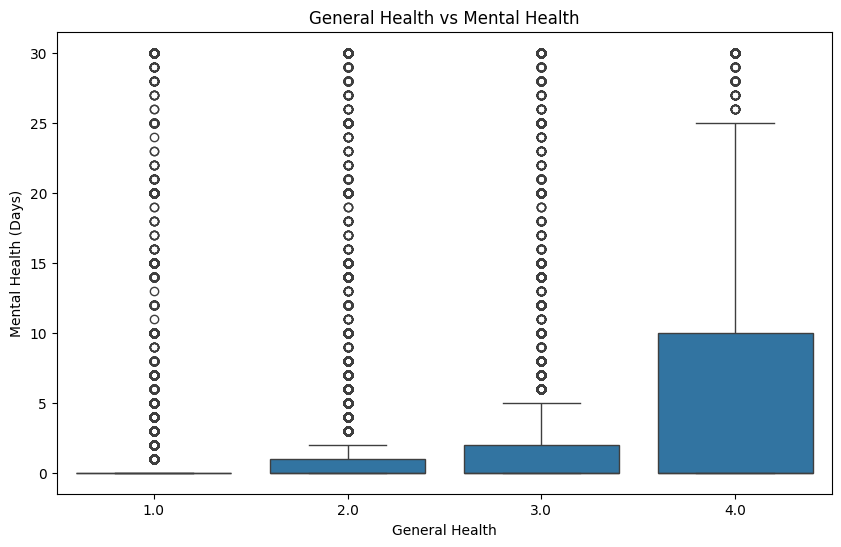

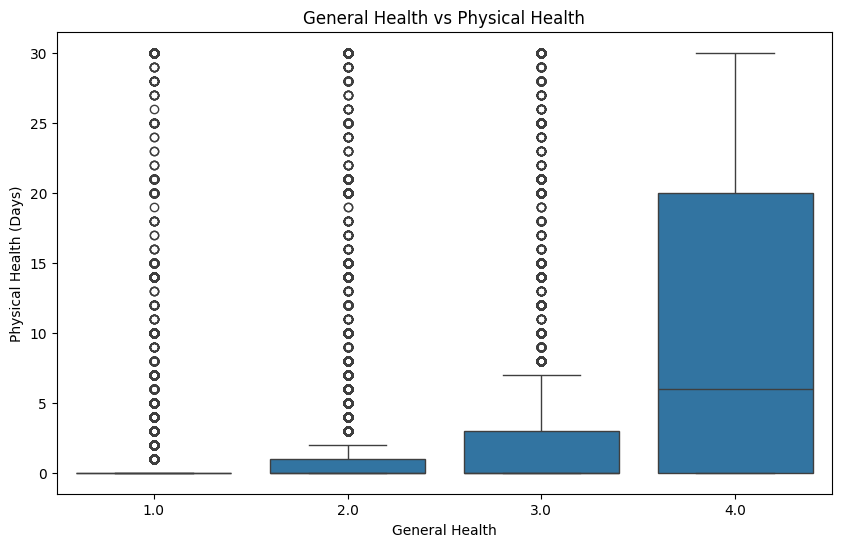

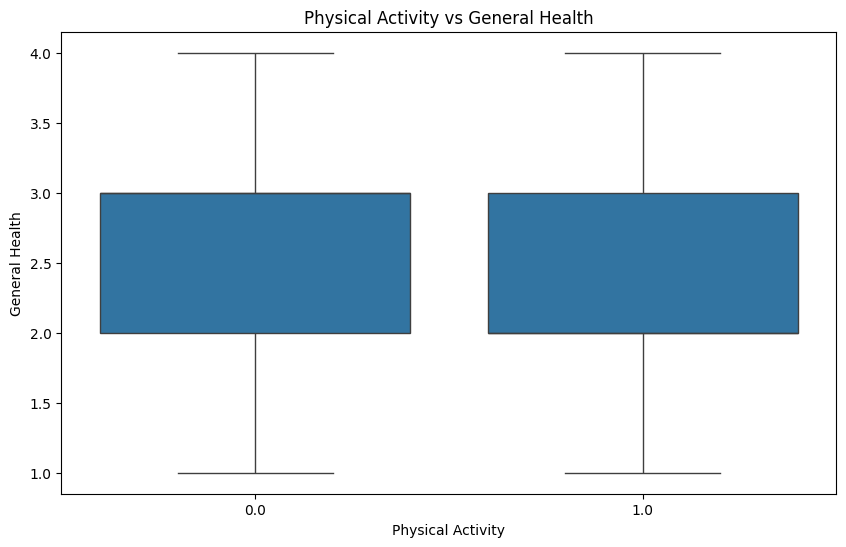

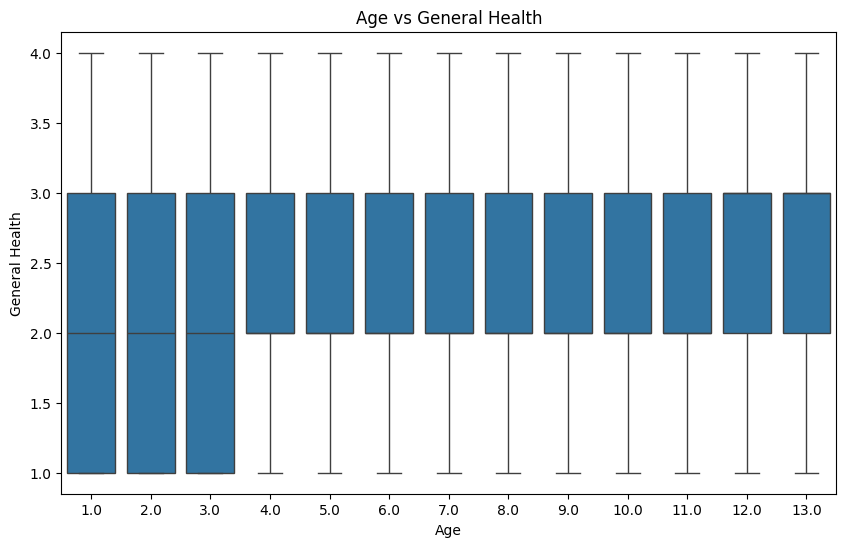

In [ ]:
#code
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `data` is your DataFrame

# 1. MentHlth vs GenHlth
plt.figure(figsize=(10, 6))
sns.boxplot(x='GenHlth', y='MentHlth', data=data)
plt.title('General Health vs Mental Health')
plt.xlabel('General Health')
plt.ylabel('Mental Health (Days)')
plt.show()

# 2. PhysHlth vs GenHlth
plt.figure(figsize=(10, 6))
sns.boxplot(x='GenHlth', y='PhysHlth', data=data)
plt.title('General Health vs Physical Health')
plt.xlabel('General Health')
plt.ylabel('Physical Health (Days)')
plt.show()

# 3. PhysActivity vs GenHlth
plt.figure(figsize=(10, 6))
sns.boxplot(x='PhysActivity', y='GenHlth', data=data)
plt.title('Physical Activity vs General Health')
plt.xlabel('Physical Activity')
plt.ylabel('General Health')
plt.show()

# 4. Age vs GenHlth
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', y='GenHlth', data=data)
plt.title('Age vs General Health')
plt.xlabel('Age')
plt.ylabel('General Health')
plt.show()


### Observation

**GenHlth vs MentHlth**

    The scatter plot shows a positive correlation between general health (GenHlth) and mental health (MentHlth). Individuals reporting poorer general health (higher GenHlth scores) also report a higher number of days with poor mental health (higher MentHlth scores). This suggests that poorer general health is associated with poorer mental health.

**GenHlth vs PhysHlth**

    The scatter plot indicates a positive correlation between general health (GenHlth) and physical health (PhysHlth). Individuals with poorer general health (higher GenHlth scores) report a much much higher number of days with poor physical health (higher PhysHlth scores). This implies that poorer general health is associated with poorer physical health.
    
**GenHlth vs PhysActivity**

    The box plot shows that individuals who engage in regular physical activity (PhysActivity = 1) tend to report better general health (lower GenHlth scores). It is almost 1 to 1
    
**GenHlth vs Age**

    The scatter plot shows a varied relationship between age and general health (GenHlth). While younger individuals generally report better general health (lower GenHlth scores), there is a noticeable increase in poorer general health (higher GenHlth scores) among older individuals. However, there is considerable variability within each age group, indicating that age alone does not determine general health.

-------------------------------------------------------------------------------------------------------------------------------------------

### **6. Diabetes Binary vs Continous Variables**

continuous_vars = ['BMI', 'MentHlth', 'PhysHlth', 'Age', 'GenHlth', 'Income']

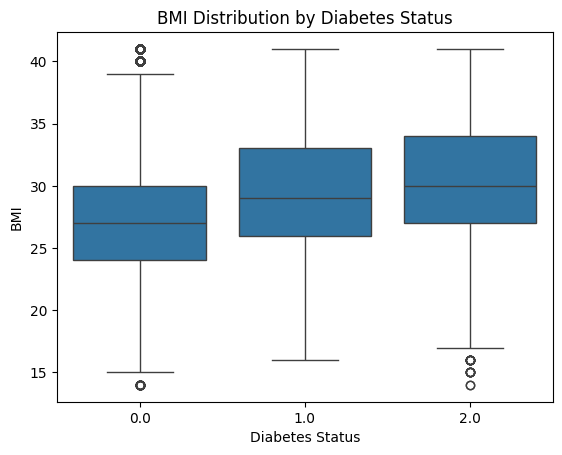

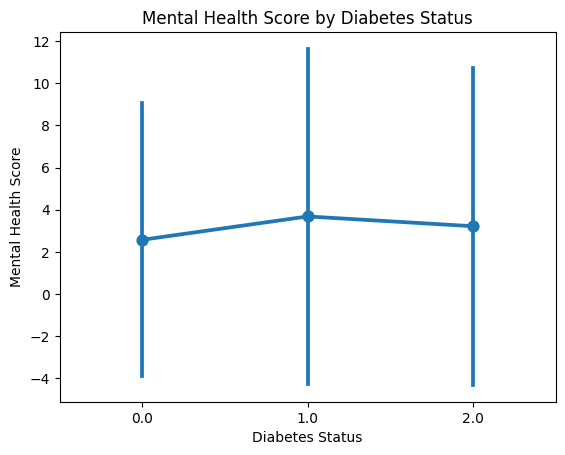

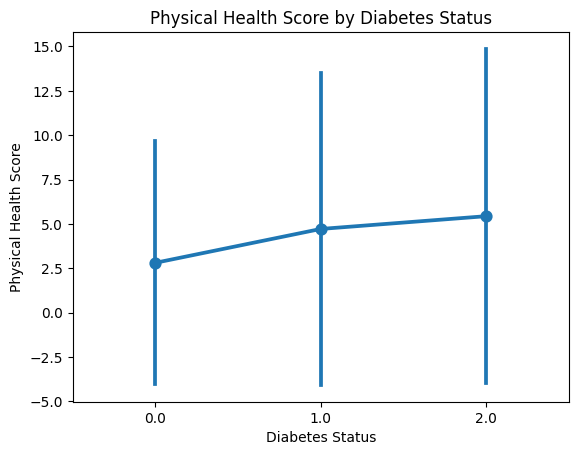

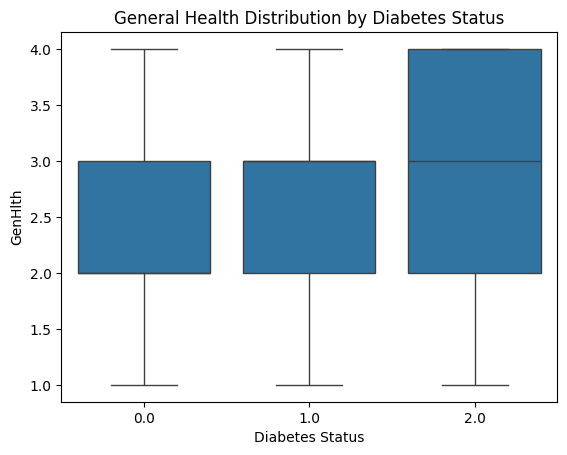

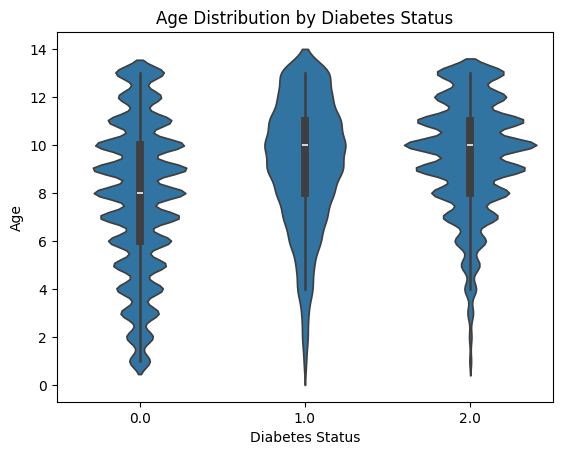

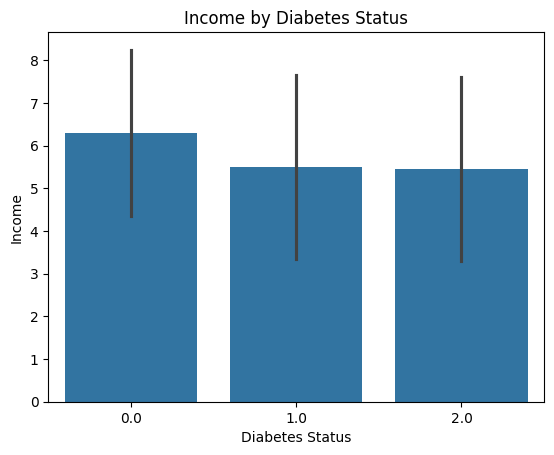

In [ ]:
# Example of Box Plot
sns.boxplot(x='Diabetes_binary', y='BMI', data=data)
plt.title('BMI Distribution by Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('BMI')
plt.show()

# Example of Point Plot
sns.pointplot(x='Diabetes_binary', y='MentHlth', data=data, ci='sd')
plt.title('Mental Health Score by Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('Mental Health Score')
plt.show()

# Example of Point Plot
sns.pointplot(x='Diabetes_binary', y='PhysHlth', data=data, ci='sd')
plt.title('Physical Health Score by Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('Physical Health Score')
plt.show()

# Example of Point Plot
sns.boxplot(x='Diabetes_binary', y='GenHlth', data=data)
plt.title('General Health Distribution by Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('GenHlth')
plt.show()

# Example of Violin Plot
sns.violinplot(x='Diabetes_binary', y='Age', data=data)
plt.title('Age Distribution by Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('Age')
plt.show()

# Example of Bar Plot with error bars
sns.barplot(x='Diabetes_binary', y='Income', data=data, ci='sd')
plt.title('Income by Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('Income')
plt.show()


### **Observations**

**Diabetes_binary vs BMI**

    The box plot indicates that individuals with diabetes (Diabetes_binary = 2) generally have a higher BMI compared to those with diabetes (Diabetes_binary = 1) and lower than those without diabetes (Diabetes_binary = 0). This suggests that a higher BMI is associated with a greater likelihood of having diabetes.

**Diabetes_binary vs MentHlth**

    The point plot shows that individuals with pre-diabetes (Diabetes_binary = 1) report more days of poor mental health (higher MentHlth scores) compared to those without diabetes (Diabetes_binary = 0) and those with diabetes (Diabetes_binary = 1). This indicates that diabetes is associated with poorer mental health.

**Diabetes_binary vs PhysHlth**

    The box plot reveals that individuals with diabetes (Diabetes_binary = 2) report more days of poor physical health (higher PhysHlth scores) compared to those without diabetes (Diabetes_binary = 0) and those without diabetes (Diabetes_binary = 0). This suggests that diabetes is associated with poorer physical health.

**Diabetes_binary vs Age**

    The box plot indicates that individuals with diabetes (Diabetes_binary = 2) are generally older than those without diabetes (Diabetes_binary = 0), most existing in age bracket 10 (ages 65 to 69). This suggests that the likelihood of having diabetes increases with age.

**Diabetes_binary vs GenHlth**

    The box plot shows that individuals with diabetes (Diabetes_binary = 2) tend to report poorer general health (higher GenHlth scores) compared to those without diabetes (Diabetes_binary = 0) and pre-diabetics (Diabetes - 1). This implies that diabetes is associated with poorer general health.

**Diabetes_binary vs Income**

    The box plot indicates that individuals with diabetes (Diabetes_binary = 2) tend to have lower income levels compared to those without diabetes (Diabetes_binary = 0) and pre-diabetics (Diabetes - 1). This suggests that lower income is associated with a higher likelihood of having diabetes.

--------------------------------------------------------------------------------------------------------------------------------------------------------

# **Multivariate analysis**

## **Correlation Heat map**

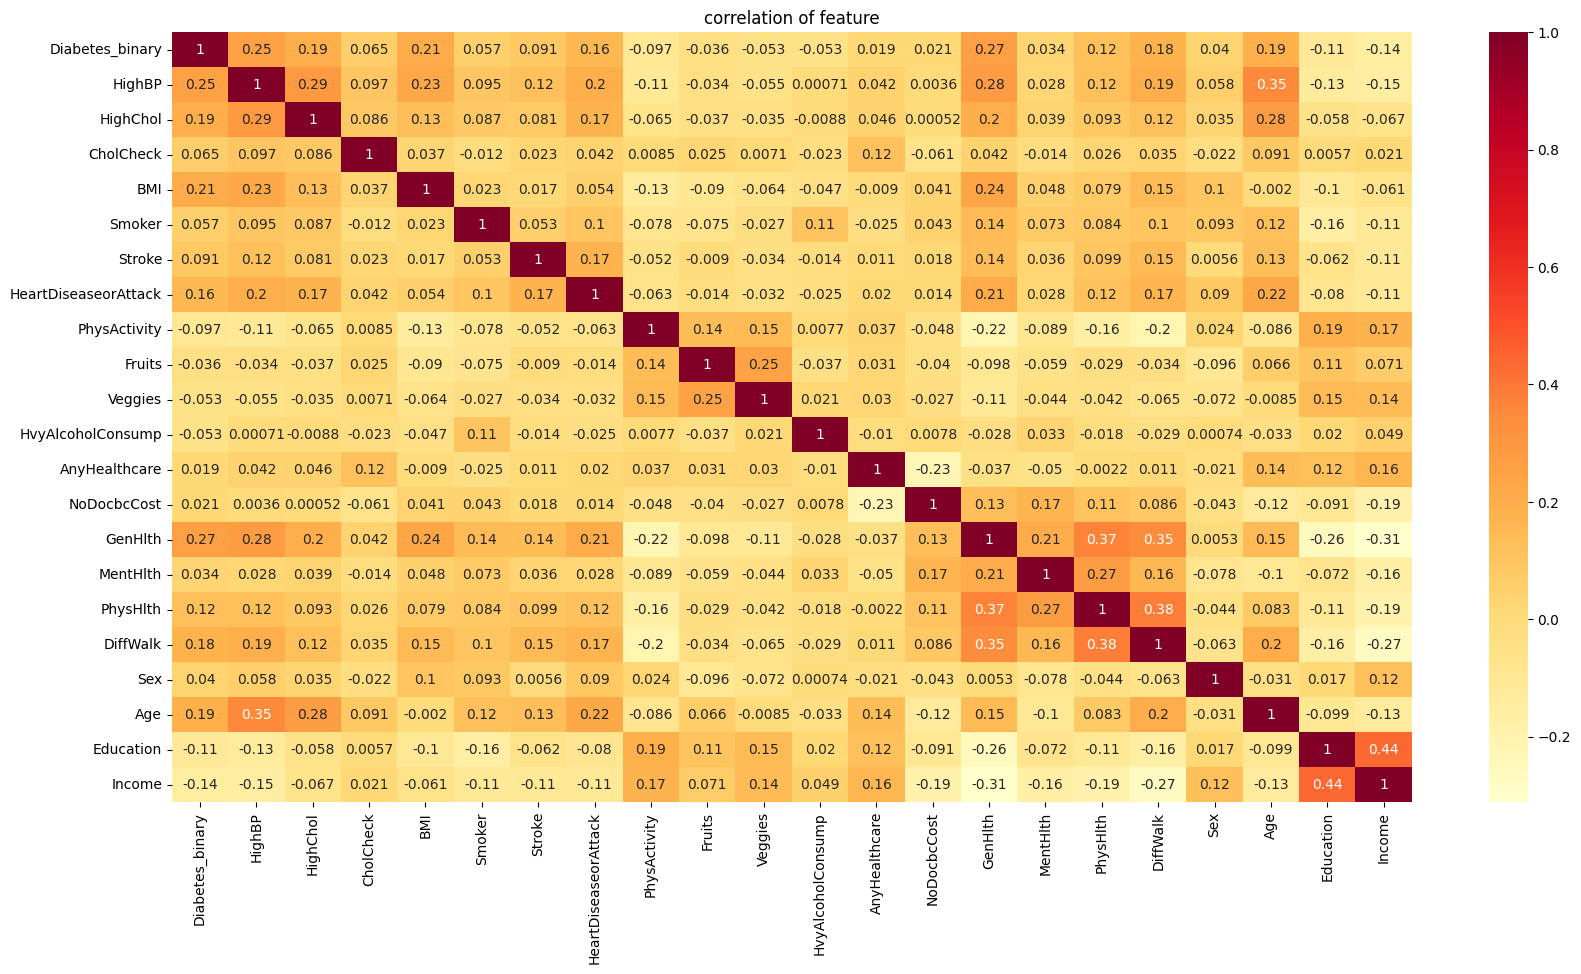

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (20,10))
sns.heatmap(data.corr(),annot=True , cmap ='YlOrRd' )
plt.title("correlation of feature")
plt.show()

 -
- BMI has a high positive correlation with the diabetes_binary,High BP, HighCol & Genhealth with a percentage of 21%,23%,13% & 24%  suggesting that individuals with higher BMI are more likely to have diabetes. On the other hand a negative correlation with education & income levels reprsenting a 1 % & 6.1% . This further indicates the two parameters can not explain likelihood of an individual having diabetes.

- Physical Activity shows a negative correlation with BMI and Diabetes_binary with a  13% & 9.7% respectively, suggesting that higher physical activity is associated with lower BMI and a lower likelihood of diabetes.

- Diabetes_binary:
 shows a positive correlation with HighBP, HighChol, and BMI, indicating that higher blood pressure, cholesterol levels, and BMI are associated with diabetes.

- HighBP:
There is  a high positive correlation with Diabetes_binary and HighChol, suggesting that individuals with high blood pressure are also likely to have diabetes and high cholesterol.

- Age:
 older age categories have a positive correlation with HighBP, HighChol, Stroke, and HeartDiseaseorAttack.

- Income.
Higher income categories  shows negative correlations with NoDocbcCost (not seeing a doctor due to cost), indicating that higher income individuals are less likely to avoid medical visits due to cost.

- Education.
Higher education levels  correlate negatively with NoDocbcCost and positively with PhysActivity, indicating that higher education is associated with better health behaviors and access to healthcare.
- Smoker:
Smoking status  correlates  positively with HvyAlcoholConsump and negatively with PhysActivity.

- HvyAlcoholConsump:
Heavy alcohol consumption correlates with other negative health indicators.




**BMI histogram**
 Shows a right-skewed distribution with a concentration of higher BMI values, this suggests that a significant portion of the population might be at risk of diabetes due to obesity.

 **Age Histogram:**
 shows a higher frequency of older individuals, this indicates an increased prevalence of diabetes in older age groups.

**Physical Activity Histogram**
shows a lower frequency of physical activity, this could suggest that a sedentary lifestyle is common among the population, which is a risk factor for diabetes.

**Smoking Status Histogram:**
shows a higher frequency of smokers,  indicating a higher risk of diabetes within the population.

**Blood Pressure Histogram:**
 shows a high frequency of elevated blood pressure readings, suggesting that hypertension might be prevalent, which is a risk factor for diabetes.


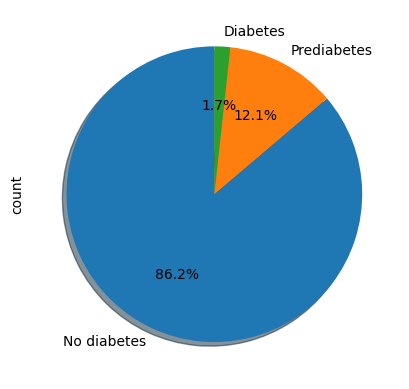

In [ ]:
labels = ['No diabetes', 'Prediabetes', 'Diabetes']  # Match the number of categories

data.Diabetes_binary.value_counts().plot.pie(labels=labels, autopct='%1.1f%%',shadow=True, startangle=90);

- The majority of the individuals do not have diabetes, which
is positive represent 88.3% of the population.
- A significant portion (10.2%) is at risk, as they are prediabetic and could develop diabetes without intervention.
- A smaller but notable portion (1.5%) has diabetes, indicating the need for targeted healthcare resources and interventions for this group.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 232960 entries, 1 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       232960 non-null  float64
 1   HighBP                232960 non-null  float64
 2   HighChol              232960 non-null  float64
 3   CholCheck             232960 non-null  float64
 4   BMI                   232960 non-null  float64
 5   Smoker                232960 non-null  float64
 6   Stroke                232960 non-null  float64
 7   HeartDiseaseorAttack  232960 non-null  float64
 8   PhysActivity          232960 non-null  float64
 9   Fruits                232960 non-null  float64
 10  Veggies               232960 non-null  float64
 11  HvyAlcoholConsump     232960 non-null  float64
 12  AnyHealthcare         232960 non-null  float64
 13  NoDocbcCost           232960 non-null  float64
 14  GenHlth               232960 non-null  float64
 15  MentH

# **Preprocessing**

**Dealing with imbalancing**- Separate Features and Target

In [ ]:
import pandas as pd

# Sample data generation (replace this with actual data loading)
data = data

# Separate the target variable from the features
X = data.drop('Diabetes_binary', axis=1)
y = data['Diabetes_binary']

# Display the shapes of the resulting DataFrames
print("Features DataFrame shape:", X.shape)
print("Target Series shape:", y.shape)

# Display the first few rows of the features and target to verify
print("\nFeatures (X):")
print(X.head())

print("\nTarget (y):")
print(y.head())

Features DataFrame shape: (232960, 21)
Target Series shape: (232960,)

Features (X):
   HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  HeartDiseaseorAttack  \
1     0.0       0.0        0.0  25.0     1.0     0.0                   0.0   
3     1.0       0.0        1.0  27.0     0.0     0.0                   0.0   
4     1.0       1.0        1.0  24.0     0.0     0.0                   0.0   
5     1.0       1.0        1.0  25.0     1.0     0.0                   0.0   
6     1.0       0.0        1.0  30.0     1.0     0.0                   0.0   

   PhysActivity  Fruits  Veggies  HvyAlcoholConsump  AnyHealthcare  \
1           1.0     0.0      0.0                0.0            0.0   
3           1.0     1.0      1.0                0.0            1.0   
4           1.0     1.0      1.0                0.0            1.0   
5           1.0     1.0      1.0                0.0            1.0   
6           0.0     0.0      0.0                0.0            1.0   

   NoDocbcCost  GenHlth  

In [ ]:
df_features = data.drop("Diabetes_binary",axis=1)
df_target = data["Diabetes_binary"]

In [ ]:
df_target.value_counts()

Diabetes_binary
0.0    200824
2.0     28112
1.0      4024
Name: count, dtype: int64

**No Diabetes (0.0) | 200824:** The vast majority of the individuals in the dataset do not have diabetes. This suggests that a significant portion of the dataset consists of healthy individuals without any diabetes diagnosis.

**Diabetes (2.0) | 28112:** A smaller, yet significant, portion of the dataset consists of individuals diagnosed with diabetes. This group is essential for understanding the factors and characteristics associated with diabetes.

**Prediabetes (1.0) | 4024:** The smallest portion of the dataset consists of individuals in the prediabetes stage. This group is critical for preventive measures and understanding the progression from prediabetes to diabetes.


In [ ]:
!pip install imbalanced-learn

In [ ]:
from imblearn.under_sampling import NearMiss
nm = NearMiss(version = 1 , n_neighbors = 1) # Set n_neighbors to 1, which is less than or equal to the smallest class size

df_features, df_target = nm.fit_resample(df_features, df_target)

In [ ]:
df_features.shape , df_target.shape

# **Feature Selection**

Feature selection is a crucial step in the machine learning pipeline, as it can improve the performance of your model by removing irrelevant or redundant features.


# 1.**Recursive Feature Elimination (RFE)**

Recursively eliminate less important features.


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Assuming 'df_features' and 'df_target' are the resampled DataFrames from NearMiss
X = df_features  # Use the resampled features
y = df_target    # Use the resampled target

# Initialize the model and RFE
model = LogisticRegression(max_iter=10000)
rfe = RFE(model, n_features_to_select=10)

# Fit the model
rfe.fit(X, y)

# Get the selected features
# Store the original DataFrame before resampling in a variable
original_df = X  # Replace 'X' with the actual variable name of the original DataFrame
selected_feature_indices = rfe.support_
selected_features = original_df.columns[selected_feature_indices]
print("Selected Features:", selected_features)

2. **Lasso (L1 Regularization)**

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# Initialize the Lasso model
lasso = Lasso(alpha=0.01)

# Fit the model
lasso.fit(X, y)

# Select features
model = SelectFromModel(lasso, prefit=True)
X_selected = model.transform(X)

# Get the selected feature names
selected_features = X.columns[model.get_support()]
print("Selected Features using Lasso:", selected_features)

#3.  **Feature Importance from Tree-based Methods**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForest model
model = RandomForestClassifier(n_estimators=100)

# Fit the model
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for visualization
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(20, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title("Feature Importances from RandomForest")
plt.show()

# Get the top features based on importance
top_features = feature_importances[feature_importances['Importance'] > 0.01]['Feature']
print("Top Features:", top_features)

- BMI (Body Mass Index):

BMI is a key indicator of obesity, which is a significant risk factor for developing diabetes. Higher BMI values typically correlate with higher risk.

- Age:

The risk of developing diabetes increases with age. Older age groups are generally at higher risk.

- Income:

Income levels can influence access to healthcare, diet quality, and lifestyle choices, all of which affect diabetes risk. Lower income may be associated with higher risk due to limited access to healthy food and healthcare.

- PhysHlth (Physical Health):

Physical health status can directly impact the likelihood of developing diabetes. Poor physical health may be associated with a higher risk of diabetes.
- GenHlth (General Health):

General health status is a broad measure that includes physical, mental, and social well-being. Poor general health may indicate higher susceptibility to diabetes.
- MentHlth (Mental Health):

Mental health conditions such as stress and depression can affect lifestyle choices and metabolic processes, potentially increasing diabetes risk.
- Education:

Education level can influence health literacy, lifestyle choices, and access to healthcare resources. Higher education levels are generally associated with lower diabetes risk.
- Sex:

There are differences in diabetes prevalence between males and females, influenced by both biological and lifestyle factors.
HighChol (High Cholesterol):

High cholesterol levels are often associated with metabolic syndrome and diabetes. Managing cholesterol is important for diabetes prevention.
- HighBP (High Blood Pressure):

High blood pressure is a common comorbidity with diabetes. It can indicate underlying cardiovascular issues linked to diabetes risk.
- Smoker:

Smoking is a risk factor for many chronic diseases, including diabetes. It can affect insulin sensitivity and overall metabolic health.
- Fruits:

Regular consumption of fruits is typically associated with a healthier diet and lower risk of diabetes. However, the type and amount of fruit consumption can vary.
- PhysActivity (Physical Activity):

Regular physical activity helps maintain healthy body weight and improves insulin sensitivity, reducing diabetes risk.
- Veggies:

Consumption of vegetables is linked to a healthy diet and lower risk of chronic diseases, including diabetes.
- DiffWalk (Difficulty Walking):

Difficulty walking may indicate mobility issues and a sedentary lifestyle, which can increase the risk of diabetes.
- HeartDiseaseorAttack:

A history of heart disease or heart attack is often associated with metabolic syndrome and diabetes. Cardiovascular issues can be both a cause and effect of diabetes.

- The top features identified are strongly aligned with known risk factors for diabetes. These include indicators of physical and mental health, lifestyle factors (such as diet and physical activity), sociodemographic variables (such as age, income, education), and comorbid conditions (like high blood pressure and high cholesterol). Understanding these features' roles can help in developing targeted interventions and improving diabetes prediction models.

# **Best of all**

In [ ]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
# Step 1: Recursive Feature Elimination (RFE)
model = LogisticRegression(max_iter=10000)
rfe = RFE(model, n_features_to_select=5)  # Selecting top 5 features
rfe.fit(X, y)
rfe_features = X.columns[rfe.support_]
print("Top 5 Features using RFE:", rfe_features.tolist())

# Step 2: Tree-based Methods (Random Forest)
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X, y)
importances = rf_model.feature_importances_
rf_features = pd.Series(importances, index=X.columns)
top_rf_features = rf_features.nlargest(5).index
print("Top 5 Features using RandomForest:", top_rf_features.tolist())

# Step 3: Lasso Regression
lasso = Lasso(alpha=0.01)
lasso.fit(X, y)
lasso_features = pd.Series(lasso.coef_, index=X.columns)
top_lasso_features = lasso_features[abs(lasso_features) > 0].nlargest(5).index
print("Top 5 Features using Lasso:", top_lasso_features.tolist())

# Combine high score features
high_score_features = list(set(rfe_features) | set(top_rf_features) | set(top_lasso_features))
print("Combined Top Features:", high_score_features)

# **Data Splitting**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print(f"Training feature set shape: {X_train.shape}")
print(f"Testing feature set shape: {X_test.shape}")
print(f"Training target set shape: {y_train.shape}")
print(f"Testing target set shape: {y_test.shape}")

In [ ]:
from sklearn.preprocessing import StandardScaler # Import the StandardScaler class

scalar = StandardScaler()
data = []

# Define features_list here with your list of feature names and data
features_list = [
    ("Feature 1 Name", X.iloc[:, 0:5]),  # Use .iloc to slice DataFrame
    ("Feature 2 Name", X.iloc[:, 5:10]), # Use .iloc to slice DataFrame
    # ... add more feature sets as needed
]

for name, X_subset in features_list: # Renamed X to X_subset for clarity
    data.append([name, scalar.fit_transform(X_subset)])


# **Model Fitting and Evaluation**

Model fitting is done after performing recurssive elimination,Lasso regression & Tree based to understand how different feature selection methods impact model performance and allows for comparison across different feature sets

In [ ]:

from sklearn.metrics import confusion_matrix, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a function to fit and evaluate models
def fit_and_evaluate(model, X_train, X_test, y_train, y_test):
    # Fit the model
    model.fit(X_train, y_train)
    # Make predictions
    y_pred = model.predict(X_test)
    # Evaluate the model
    print(f"Model: {model.__class__.__name__}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

# Step 1: Recursive Feature Elimination (RFE)
model_rfe = LogisticRegression(max_iter=10000)
rfe = RFE(model_rfe, n_features_to_select=5)
rfe.fit(X_train, y_train)
rfe_features = X_train.columns[rfe.support_]

# Train and evaluate model with RFE-selected features
X_train_rfe = X_train[rfe_features]
X_test_rfe = X_test[rfe_features]
model_rfe_final = LogisticRegression(max_iter=10000)
fit_and_evaluate(model_rfe_final, X_train_rfe, X_test_rfe, y_train, y_test)

# Step 2: Tree-based Methods (Random Forest)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
fit_and_evaluate(rf_model, X_train, X_test, y_train, y_test)

# Step 3: Lasso Regression
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
lasso_features = pd.Series(lasso.coef_, index=X.columns)
top_lasso_features = lasso_features[abs(lasso_features) > 0].index

# Train and evaluate model with Lasso-selected features
X_train_lasso = X_train[top_lasso_features]
X_test_lasso = X_test[top_lasso_features]
model_lasso_final = LogisticRegression(max_iter=10000)
fit_and_evaluate(model_lasso_final, X_train_lasso, X_test_lasso, y_train, y_test)

# Combine features from all methods

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Assuming 'data' is a DataFrame where features are in all columns except the last, and target is in the last column
features = data.iloc[:, :-1] # Select all columns except the last one as features
target = data.iloc[:, -1]   # Select the last column as the target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42, stratify=target)

# Define models to evaluate
models = [
    ['Logistic Regression', LogisticRegression(max_iter=10000)],
    ['Random Forest', RandomForestClassifier(max_depth=5, n_estimators=1000, class_weight='balanced')],
    ['Decision Tree', DecisionTreeClassifier(max_depth=5)],
    ['K-Nearest Neighbors', KNeighborsClassifier(n_neighbors=6)],
    ['Support Vector Machine', SVC(probability=True)]
]

# Initialize dictionaries to store results
results = {}

# Train and evaluate models
for name, model in models:
    print(f"Training {name}...")

    # Fit the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    # Store results
    results[name] = {
        'Confusion Matrix': conf_matrix,
        'Classification Report': class_report
    }

    # Print results
    print(f"\n{name} - Confusion Matrix:\n{conf_matrix}")
    print(f"{name} - Classification Report:\n{class_report}")

# Optional: Cross-validation scores for each model
for name, model in models:
    cv_scores = cross_val_score(model, features, target, cv=5, scoring='accuracy')
    print(f"{name} - Cross-Validation Scores: {cv_scores}")
    print(f"{name} - Mean CV Score: {np.mean(cv_scores)}")

# Print a summary of results
print("\nSummary of Model Results:")
for name, result in results.items():
    print(f"\n{name} - Confusion Matrix:\n{result['Confusion Matrix']}")
    print(f"{name} - Classification Report:\n{result['Classification Report']}")

In [ ]:
import pandas as pd
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from tqdm import tqdm

# Initialize an empty DataFrame to store evaluations
evaluations = pd.DataFrame()

# DEFINE splited_data HERE with your actual data splits
# Example: Replace with your actual data splits
X_train1, X_test1, y_train1, y_test1 = train_test_split(..., ..., test_size=0.2, random_state=42)  # Replace ... with your data and target
X_train2, X_test2, y_train2, y_test2 = train_test_split(..., ..., test_size=0.2, random_state=42)  # Replace ... with your data and target
splited_data = [
    {"name": "Feature_Selection_Method_1", "X_train": X_train1, "X_test": X_test1, "y_train": y_train1, "y_test": y_test1},
    {"name": "Feature_Selection_Method_2", "X_train": X_train2, "X_test": X_test2, "y_train": y_train2, "y_test": y_test2}
    # ... add more dictionaries for other feature selection methods
]

# Loop through each dataset split
for data in tqdm(splited_data):
    fs = data["name"]

    # Define models
    models = [
        ['LR', LogisticRegression(max_iter=10000), data],
        ['RF', RandomForestClassifier(max_depth=5, n_estimators=1000, class_weight='balanced'), data],
        ['DT', DecisionTreeClassifier(max_depth=5), data],
        ['KNN', KNeighborsClassifier(n_neighbors=6), data],
        ['SVM', SVC(probability=True), data]
    ]

    # Initialize lists to store metrics
    roc_list = []
    accuracy_list = []
    f1_list = []
    recall_list = []
    precision_list = []
    pred_list = []

    # Evaluate each model
    for name, model, data in tqdm(models):
        X_train, X_test, y_train, y_test = data['X_train'], data['X_test'], data['y_train'], data['y_test']

        # Fit the model
        model.fit(X_train, y_train)

        # Predict probabilities
        y_pred_prob = model.predict_proba(X_test)[:, 1]
        y_pred = [0 if (y < 0.5) else 1 for y in y_pred_prob]

        # Store predictions
        pred_list.append({
            "model": name,
            "fs": fs,
            "data": y_pred
        })

        import pandas as pd
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from tqdm import tqdm

# Initialize an empty DataFrame to store evaluations
evaluations = pd.DataFrame()

# Example structure of splited_data
# splited_data = [
#     {"name": "Feature_Selection_Method_1", "X_train": X_train1, "X_test": X_test1, "y_train": y_train1, "y_test": y_test1},
#     {"name": "Feature_Selection_Method_2", "X_train": X_train2, "X_test": X_test2, "y_train": y_train2, "y_test": y_test2}
# ]

# Loop through each dataset split
for data in tqdm(splited_data):
    fs = data["name"]

    # Define models
    models = [
        ['LR', LogisticRegression(max_iter=10000), data],
        ['RF', RandomForestClassifier(max_depth=5, n_estimators=1000, class_weight='balanced'), data],
        ['DT', DecisionTreeClassifier(max_depth=5), data],
        ['KNN', KNeighborsClassifier(n_neighbors=6), data],
        ['SVM', SVC(probability=True), data]
    ]

    # Initialize lists to store metrics
    roc_list = []
    accuracy_list = []
    f1_list = []
    recall_list = []
    precision_list = []
    pred_list = []

    # Evaluate each model
    for name, model, data in tqdm(models):
        X_train, X_test, y_train, y_test = data['X_train'], data['X_test'], data['y_train'], data['y_test']

        # Fit the model
        model.fit(X_train, y_train)

        # Predict probabilities
        y_pred_prob = model.predict_proba(X_test)[:, 1]
        y_pred = [0 if (y < 0.5) else 1 for y in y_pred_prob]

        # Store predictions
        pred_list.append({
            "model": name,
            "fs": fs,
            "data": y_pred
        })

        # Evaluate the model
        # Compute metrics
        roc_list.append(metrics.roc_auc_score(y_test, y_pred_prob, multi_class='ovr')) # Add multi_class parameter
        accuracy_list.append(metrics.accuracy_score(y_test, y_pred))
        f1_list.append(metrics.f1_score(y_test, y_pred))
        recall_list.append(metrics.recall_score(y_test, y_pred))
        precision_list.append(metrics.precision_score(y_test, y_pred))

    # Create a DataFrame for the current evaluation
    names = [name for name, _, _ in models]
    fsm = [data['name'] for _, _, data in models]
    evaluation = pd.DataFrame({
        'classifiers': names,
        'Feature selection method': fsm,
        'AUC Score': roc_list,
        'Accuracy': accuracy_list,
        'Precision': precision_list,
        'Recall': recall_list,
        'F-measure': f1_list
    })

    # Append to the overall evaluations DataFrame
    evaluations = pd.concat([evaluations, evaluation], ignore_index=True)

    # Print the sorted evaluation results
    evaluation = evaluation.sort_values(by='AUC Score', ascending=False)
    print(evaluation)
    # Create a DataFrame for the current evaluation
    names = [name for name, _, _ in models]
    fsm = [data['name'] for _, _, data in models]
    evaluation = pd.DataFrame({
        'classifiers': names,
        'Feature selection method': fsm,
        'AUC Score': roc_list,
        'Accuracy': accuracy_list,
        'Precision': precision_list,
        'Recall': recall_list,
        'F-measure': f1_list
    })

    # Append to the overall evaluations DataFrame
    evaluations = pd.concat([evaluations, evaluation], ignore_index=True)

    # Print the sorted evaluation results
    evaluation = evaluation.sort_values(by='AUC Score', ascending=False)
    print(evaluation)